In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import feature_selection
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%precision 2

pd.set_option('max_columns',200)

print(pd.__name__, pd.__version__)
print(plt.__name__, np.__version__)
print(np.__name__, np.__version__)
print(sns.__name__, np.__version__)
print(sklearn.__name__, sklearn.__version__)

pandas 1.2.3
matplotlib.pyplot 1.20.1
numpy 1.20.1
seaborn 1.20.1
sklearn 0.24.1


Numeric Variable Definitions:
- Life expectancy = Average life expectancy in years 
- Infant deaths = Number of Infant Deaths per 1000 population
- Alcohol = Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)	
- percentage expenditure = Expenditure on health as a percentage of Gross Domestic Product per capita(%)	
- HepatitisB = Hepatitis B (HepB) immunization coverage among 1-year-olds (%)	
- Measles = Number of reported cases 
- BMI = Prevalence of overweight among adults, BMI ≥ 25, crude
- under-five deaths = Number of under-five deaths per 1000 population	
- Total expenditure = General government expenditure on health as a percentage of total government expenditure (%)
- HIV/AIDS = Deaths per 1000 live births HIV/AIDS (0-4 years)	 
- GDP = Gross Domestic Product in USD	 
- Population = Population of the country
- thinness1-19years = Prevalence of thinness among children and adolescents for Age 10 to 19 (% )	
- thinness5-9years = Prevalence of thinness among children for Age 5 to 9(%)	
- Income composition of resources = Relative share of each income source or group of sources, expressed as a percentage of the aggregate total income of that group or area.
- Schooling = Number of years of Schooling
- Adult Mortality = Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Polio = Polio (Pol3) immunization coverage among 1-year-olds (%)
- Diphtheria = Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)


In [ ]:
df = pd.read_csv('DataWithoutNaNIndex.csv')
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
0,Developing,65.0,62,0.01,71.279624,65.0,1154,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,233.2,69.0,65.0
1,Developing,59.9,64,0.01,73.523582,62.0,492,18.6,86,8.18,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,234.3,62.0,62.0
2,Developing,59.9,66,0.01,73.219243,64.0,430,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,235.5,64.0,64.0
3,Developing,59.5,69,0.01,78.184215,67.0,2787,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,242.3,67.0,67.0
4,Developing,59.2,71,0.01,7.097109,68.0,3013,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,248.2,68.0,68.0


In [ ]:
df.shape

(1634, 20)

In [ ]:
df.describe()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1.634000e+03,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,69.471971,32.827417,4.533837,702.666953,79.206242,2244.433905,38.248715,44.591799,5.943507,1.683843,5597.847034,1.478375e+07,4.834211,4.890392,0.632630,12.136781,194.278072,87.886169,87.974296
std,8.645932,121.366831,4.041583,1766.671934,25.578063,10129.853889,19.787508,163.598003,2.301551,4.947487,11522.929508,7.077009e+07,4.614473,4.668795,0.183573,2.801415,108.080422,12.720916,12.698996
min,44.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,0.740000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,53.080000,23.000000,19.000000
25%,64.600000,1.000000,0.810000,37.139483,74.000000,0.000000,19.500000,1.000000,4.392500,0.100000,462.241716,2.031178e+05,1.600000,1.600000,0.511250,10.400000,120.300000,83.000000,83.000000
50%,71.800000,3.000000,3.755000,145.210267,89.000000,15.000000,43.950000,4.000000,5.830000,0.100000,1588.040565,1.440206e+06,3.000000,3.100000,0.675000,12.300000,169.500000,93.000000,93.000000
75%,75.000000,22.750000,7.380000,509.293006,96.000000,376.000000,55.800000,30.000000,7.457500,0.675000,4773.284308,7.805794e+06,7.000000,7.100000,0.752000,14.000000,244.800000,97.000000,97.000000
max,89.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,14.390000,43.500000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,696.900000,99.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1634 non-null   object 
 1   Life expectancy                  1634 non-null   float64
 2   infant deaths                    1634 non-null   int64  
 3   Alcohol                          1634 non-null   float64
 4   percentage expenditure           1634 non-null   float64
 5   Hepatitis B                      1634 non-null   float64
 6   Measles                          1634 non-null   int64  
 7    BMI                             1634 non-null   float64
 8   under-five deaths                1634 non-null   int64  
 9   Total expenditure                1634 non-null   float64
 10   HIV/AIDS                        1634 non-null   float64
 11  GDP                              1634 non-null   float64
 12  Population          

In [ ]:
# Change Developed/Developing to Dummy Variables 

df3 = pd.get_dummies(df, prefix=None)
df3.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria,Status_Developed,Status_Developing
0,65.0,62,0.01,71.279624,65.0,1154,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,233.2,69.0,65.0,0,1
1,59.9,64,0.01,73.523582,62.0,492,18.6,86,8.18,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,234.3,62.0,62.0,0,1
2,59.9,66,0.01,73.219243,64.0,430,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,235.5,64.0,64.0,0,1
3,59.5,69,0.01,78.184215,67.0,2787,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,242.3,67.0,67.0,0,1
4,59.2,71,0.01,7.097109,68.0,3013,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,248.2,68.0,68.0,0,1


# Functions 

In [ ]:
def distributions(varname, longname, data): 
    """Plots the distributions of variable faceted by country status."""
    
    fig = plt.figure(figsize = (10,4))
    title = fig.suptitle(longname, fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(1,2, 1)
    ax1.set_title("Developed Countries")
    freq1, bins1, patches1 = ax1.hist(df.loc[df['Status']=='Developed'][varname], bins=15, edgecolor='white', linewidth=1)

    ax2 = fig.add_subplot(1,2, 2)
    ax2.set_title("Developing Countries")
    freq2, bins2, patches2 = ax2.hist(df.loc[df['Status']=='Developing'][varname], bins=15, edgecolor='white', linewidth=1)
    plt.show()
    return

In [ ]:
def runModel(varname, data, model): 
    """Prints results of regression model and returns X and y data sets."""
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('R2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test))
    
    plt.scatter(pred_test, (y_test - pred_test))
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()    
    
    return X, y

In [ ]:
def runRegularizationModel(varname, data, model): 
    """Prints results and coefficients of regularlized regression model and returns X and y data sets."""
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    
    countIV = 0  
    
    for coef in mdl.coef_:
        if coef != 0:
            countIV += 1
    
    print('R2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test), '\n')
    print(list(zip(mdl.coef_, X_train.columns)))
    print('There are ' + str(countIV) + ' independent variables in the model.', '\n')
    print('______________________________________________________')
    
    plt.scatter(pred_test, (y_test - pred_test))
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    return X, y

In [ ]:
def predictors(p, X, y, longname):
    "Returns the most informative predictors and their weights."

    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=p)
    X_train_fs = fs.fit_transform(X, np.ravel(y))

    predictors = pd.DataFrame(columns = ['Variable', 'Score'])

    for i in range(len(X.columns.values)):
        predictors = predictors.append({'Variable' : X.columns.values[i], 'Score' : round(fs.scores_[i],3)}, ignore_index = True)

    return predictors.sort_values(by=['Score'], ascending=False)

# Predicting Life Expectancy

In [ ]:
# Dropped one of the two dummy levels for regression Analsyis.
df3 = df3.drop(columns=['Status_Developing'], axis=1)

Dropped one of the two dummy variable levels to be used for regression analysis. 

In [ ]:
varname = 'Life expectancy '
longname = 'Life Expectancy by Country Type'

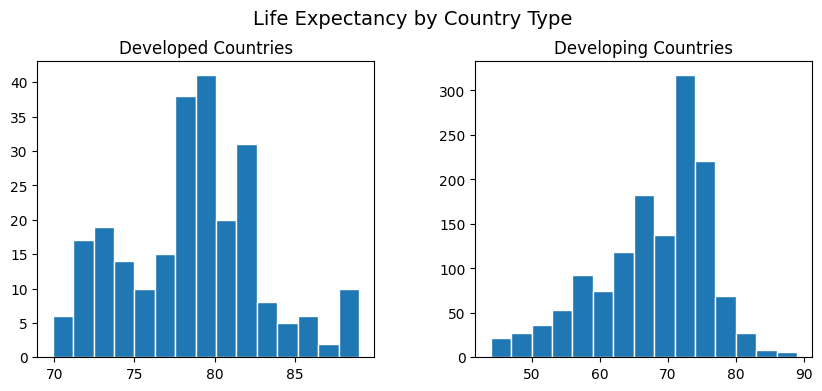

In [ ]:
distributions(varname, longname, df)

Check distribution of life expectancy by developed vs developing countries. Notice the difference in the X-axis range. The developed countries peak around 78-79, where as the developing countries peak around 72.

### Entire Data Frame

#### Linear Regression with all features

R2 on Training: 0.9268456315344034
R2 on Test:     0.9165254729916102 

Difference:  0.010320158542793112 

RMSE on Training: 5.2552977482042476
RMSE on Test:     6.95244645161688


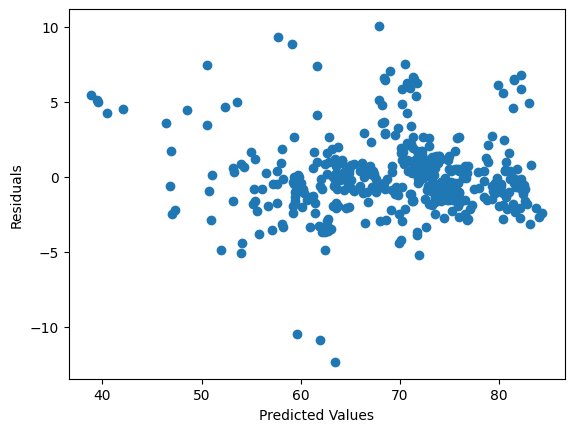

,VIF Factor,features
0,240.471772,infant deaths
1,4.991653,Alcohol
2,14.833246,percentage expenditure
3,14.325597,Hepatitis B
4,1.579851,Measles
5,8.350677,BMI
6,230.388003,under-five deaths
7,8.368575,Total expenditure
8,2.726095,HIV/AIDS
9,16.722327,GDP


In [ ]:
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, df3, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

In [ ]:
# Best predictors using the SelectPercentile method.
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds

Best predictors of Life Expectancy by Country Type 



,Variable,Score
15,Adult Mortality,8459.626
14,Schooling,1874.560
13,Income composition of resources,1812.303
8,HIV/AIDS,898.302
5,BMI,682.757
16,Polio,595.209
17,Diphtheria,582.362
11,thinness 1-19 years,436.577
12,thinness 5-9 years,434.942
9,GDP,403.177


A significant number of variables have variance inflation factors over 10 indiciting the model with all the variables suffer from multicollinearity. Ridge Regression will be tested along with Lasso regression to help determine the independent variables to select. 

The alpha value is  0.01
R2 on Training: 0.8383794584816122
R2 on Test:     0.8355581111345184 

Difference:  0.0028213473470938277 

RMSE on Training: 11.61057207820169
RMSE on Test:     13.696075530024729 

[(3.2348560215827045e-05, 'infant deaths'), (0.04043086143575658, 'Alcohol'), (0.00023442701102597736, 'percentage expenditure'), (0.0021962818678998345, 'Hepatitis B'), (-3.3689718848033584e-07, 'Measles '), (0.03324257802754908, ' BMI '), (-0.00041987100261106625, 'under-five deaths '), (0.06869182871603287, 'Total expenditure'), (-0.24791142130469124, ' HIV/AIDS'), (3.7427142701216965e-05, 'GDP'), (1.4826483522978367e-09, 'Population'), (-0.0699629916870177, ' thinness  1-19 years'), (-0.06573278248233064, ' thinness 5-9 years'), (5.622811441859375, 'Income composition of resources'), (0.3719649095545244, 'Schooling'), (-0.020483154994393824, 'Adult Mortality'), (0.04033774400728749, 'Polio'), (0.04134381934838984, 'Diphtheria'), (1.0126707324813125, 'Status_Developed')]
There 

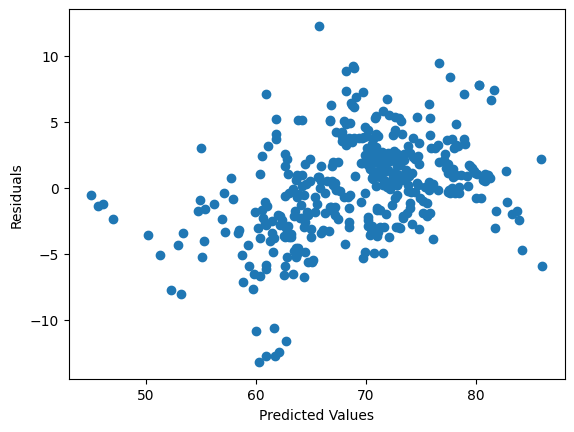

The alpha value is  1.2575
R2 on Training: 0.8383794584816122
R2 on Test:     0.8355581111345184 

Difference:  0.0028213473470938277 

RMSE on Training: 11.61057207820169
RMSE on Test:     13.696075530024729 

[(3.2348560215827045e-05, 'infant deaths'), (0.04043086143575658, 'Alcohol'), (0.00023442701102597736, 'percentage expenditure'), (0.0021962818678998345, 'Hepatitis B'), (-3.3689718848033584e-07, 'Measles '), (0.03324257802754908, ' BMI '), (-0.00041987100261106625, 'under-five deaths '), (0.06869182871603287, 'Total expenditure'), (-0.24791142130469124, ' HIV/AIDS'), (3.7427142701216965e-05, 'GDP'), (1.4826483522978367e-09, 'Population'), (-0.0699629916870177, ' thinness  1-19 years'), (-0.06573278248233064, ' thinness 5-9 years'), (5.622811441859375, 'Income composition of resources'), (0.3719649095545244, 'Schooling'), (-0.020483154994393824, 'Adult Mortality'), (0.04033774400728749, 'Polio'), (0.04134381934838984, 'Diphtheria'), (1.0126707324813125, 'Status_Developed')]
Ther

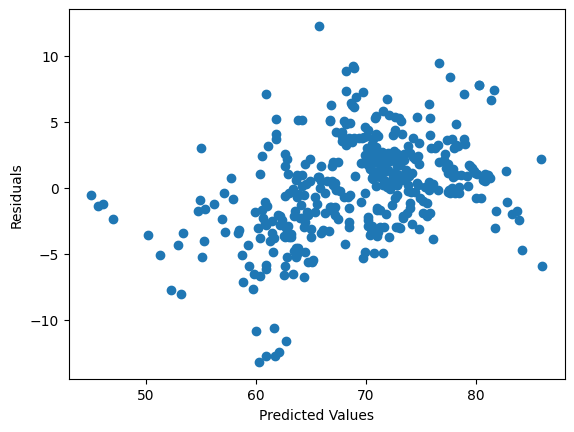

The alpha value is  2.505
R2 on Training: 0.8383794584816122
R2 on Test:     0.8355581111345184 

Difference:  0.0028213473470938277 

RMSE on Training: 11.61057207820169
RMSE on Test:     13.696075530024729 

[(3.2348560215827045e-05, 'infant deaths'), (0.04043086143575658, 'Alcohol'), (0.00023442701102597736, 'percentage expenditure'), (0.0021962818678998345, 'Hepatitis B'), (-3.3689718848033584e-07, 'Measles '), (0.03324257802754908, ' BMI '), (-0.00041987100261106625, 'under-five deaths '), (0.06869182871603287, 'Total expenditure'), (-0.24791142130469124, ' HIV/AIDS'), (3.7427142701216965e-05, 'GDP'), (1.4826483522978367e-09, 'Population'), (-0.0699629916870177, ' thinness  1-19 years'), (-0.06573278248233064, ' thinness 5-9 years'), (5.622811441859375, 'Income composition of resources'), (0.3719649095545244, 'Schooling'), (-0.020483154994393824, 'Adult Mortality'), (0.04033774400728749, 'Polio'), (0.04134381934838984, 'Diphtheria'), (1.0126707324813125, 'Status_Developed')]
There

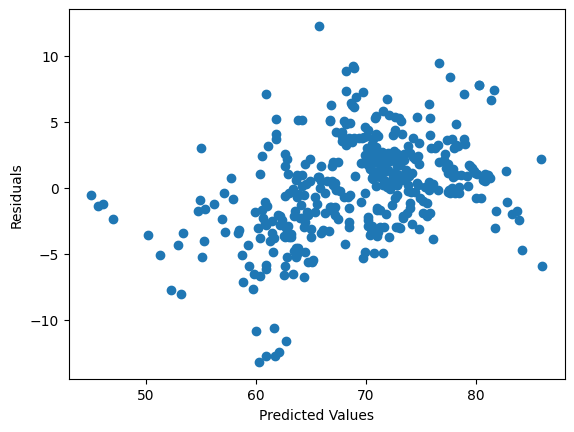

The alpha value is  3.7525
R2 on Training: 0.8383794584816122
R2 on Test:     0.8355581111345184 

Difference:  0.0028213473470938277 

RMSE on Training: 11.61057207820169
RMSE on Test:     13.696075530024729 

[(3.2348560215827045e-05, 'infant deaths'), (0.04043086143575658, 'Alcohol'), (0.00023442701102597736, 'percentage expenditure'), (0.0021962818678998345, 'Hepatitis B'), (-3.3689718848033584e-07, 'Measles '), (0.03324257802754908, ' BMI '), (-0.00041987100261106625, 'under-five deaths '), (0.06869182871603287, 'Total expenditure'), (-0.24791142130469124, ' HIV/AIDS'), (3.7427142701216965e-05, 'GDP'), (1.4826483522978367e-09, 'Population'), (-0.0699629916870177, ' thinness  1-19 years'), (-0.06573278248233064, ' thinness 5-9 years'), (5.622811441859375, 'Income composition of resources'), (0.3719649095545244, 'Schooling'), (-0.020483154994393824, 'Adult Mortality'), (0.04033774400728749, 'Polio'), (0.04134381934838984, 'Diphtheria'), (1.0126707324813125, 'Status_Developed')]
Ther

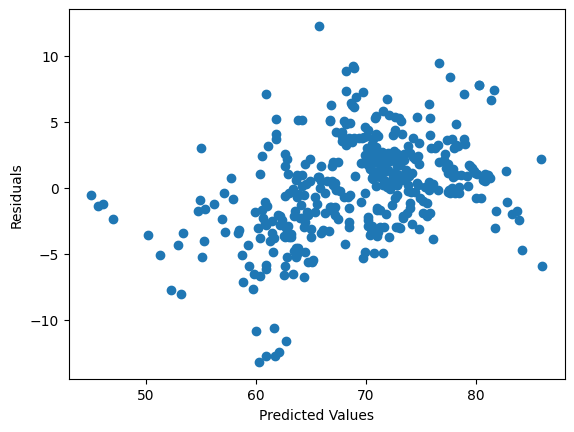

The alpha value is  5.0
R2 on Training: 0.8383794584816122
R2 on Test:     0.8355581111345184 

Difference:  0.0028213473470938277 

RMSE on Training: 11.61057207820169
RMSE on Test:     13.696075530024729 

[(3.2348560215827045e-05, 'infant deaths'), (0.04043086143575658, 'Alcohol'), (0.00023442701102597736, 'percentage expenditure'), (0.0021962818678998345, 'Hepatitis B'), (-3.3689718848033584e-07, 'Measles '), (0.03324257802754908, ' BMI '), (-0.00041987100261106625, 'under-five deaths '), (0.06869182871603287, 'Total expenditure'), (-0.24791142130469124, ' HIV/AIDS'), (3.7427142701216965e-05, 'GDP'), (1.4826483522978367e-09, 'Population'), (-0.0699629916870177, ' thinness  1-19 years'), (-0.06573278248233064, ' thinness 5-9 years'), (5.622811441859375, 'Income composition of resources'), (0.3719649095545244, 'Schooling'), (-0.020483154994393824, 'Adult Mortality'), (0.04033774400728749, 'Polio'), (0.04134381934838984, 'Diphtheria'), (1.0126707324813125, 'Status_Developed')]
There a

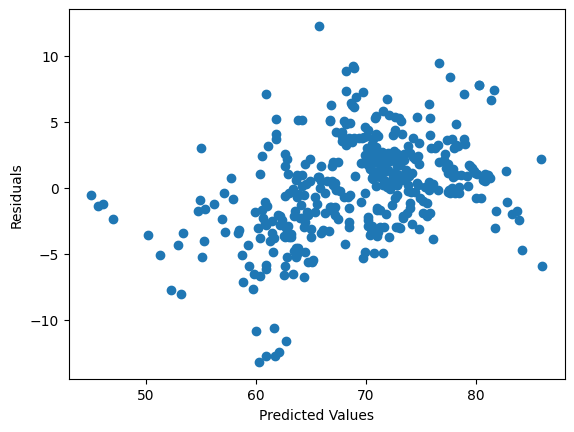

In [ ]:
# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,13,50) 
alphas = np.linspace(.01,5,5)

# After tuning, selected the best alpha to run model on.
for a in alphas:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3, Ridge(normalize=True))

The residual graphs appears to exhibit a positive relationship between the residuals and predicted Y values indiciating the linear regression assumptions do not hold. 

The alpha value is  2.75
R2 on Training: 0.9005039283658772
R2 on Test:     0.8843096795482075 

Difference:  0.016194248817669732 

RMSE on Training: 7.147645344787261
RMSE on Test:     9.63564319245132 

[(-0.0, 'infant deaths'), (0.08084582326747058, 'Alcohol'), (0.0, 'percentage expenditure'), (0.0, 'Hepatitis B'), (-5.7699502430572635e-06, 'Measles '), (0.04276481723971677, ' BMI '), (-0.002322026812059593, 'under-five deaths '), (0.0, 'Total expenditure'), (0.0, ' HIV/AIDS'), (8.953314651751211e-05, 'GDP'), (3.4031953975130796e-09, 'Population'), (-0.0, ' thinness  1-19 years'), (-0.0, ' thinness 5-9 years'), (0.0, 'Income composition of resources'), (0.0, 'Schooling'), (-0.06232944521279047, 'Adult Mortality'), (0.028021136984135123, 'Polio'), (0.037404509249038265, 'Diphtheria'), (0.0, 'Status_Developed')]
There are 9 independent variables in the model. 

______________________________________________________


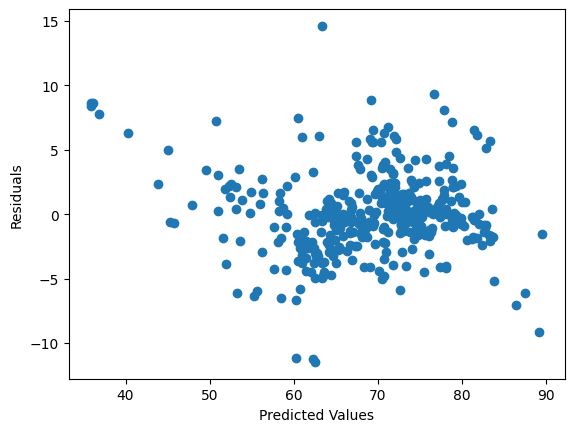

In [ ]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,13,50) 
alphas = np.linspace(2.66,2.93,1000)

# After tuning, selected the best alpha to run model on.
for a in [2.75]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3, Lasso(alpha=a, max_iter=10000))

#### Ridge Regression with Lasso Selected features

The residual plot for lasso regression looks more valid than the ridge regression plots. There are a few outliers around the predicted values of 62 with residuals.

An alpha value was choosen to balance the testing set's R$^2$ and a parsimonious model. 

The alpha value is  0.14
R2 on Training: 0.8985363723241679
R2 on Test:     0.8877746592915517 

Difference:  0.010761713032616194 

RMSE on Training: 7.288991556262294
RMSE on Test:     9.347051127483805 

[(0.250665549779031, 'Alcohol'), (-4.0342494889408344e-06, 'Measles '), (0.0544349951396279, ' BMI '), (-0.001577606901447517, 'under-five deaths '), (7.457445322256333e-05, 'GDP'), (2.656836070617154e-09, 'Population'), (-0.052244516037900736, 'Adult Mortality'), (0.04596682124091587, 'Polio'), (0.04804460128345193, 'Diphtheria')]
There are 9 independent variables in the model. 

______________________________________________________


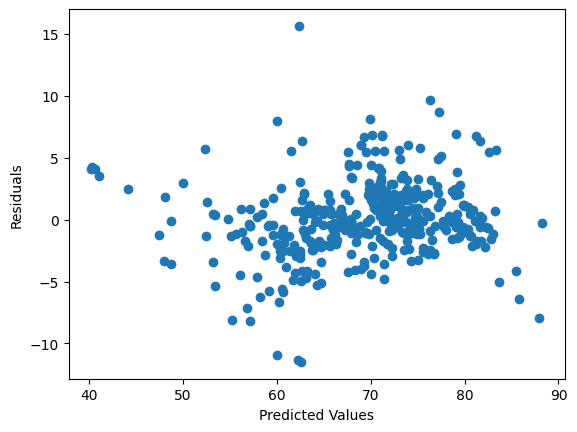

In [ ]:
# Re-run ridge regression with Lasso selected variables

lassoVars = ['Alcohol', 'Measles ', ' BMI ', 'under-five deaths ', 'GDP', 'Population', 'Adult Mortality', 'Polio', 'Diphtheria', 'Life expectancy '] 
df3LassoVars = df3[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3LassoVars, Ridge(alpha=a, normalize=True))

When the lambda values is larger than .14, the residual graphs appears to develop a positive relationship like in the previous ridge regression examples. Again, there appears to be outliers around the predicted value of 61.

#### Linear Regression with SelectPercentile method Selected features

In [ ]:
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Income composition of resources', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
df3BestVars = df3[bestVars]

y = df3BestVars['Life expectancy ']
X = df3BestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     4407.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:21:11   Log-Likelihood:                -2843.1
No. Observations:                1225   AIC:                             5694.
Df Residuals:                    1221   BIC:                             5715.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,34.543250,Income composition of resources
1,38.950797,Schooling
2,2.750784,Adult Mortality


The SelectPercentile method Selected features still suffer from multicollinearity so they will be used with ridge regression. 

The alpha value is  0.1
R2 on Training: 0.9106302320142159
R2 on Test:     0.8996361252669145 

Difference:  0.010994106747301391 

RMSE on Training: 6.420187205554283
RMSE on Test:     8.359130500834464 

[(7.037119214235341, 'Income composition of resources'), (0.7117949648071735, 'Schooling'), (-0.0510261763762334, 'Adult Mortality')]
There are 3 independent variables in the model. 

______________________________________________________


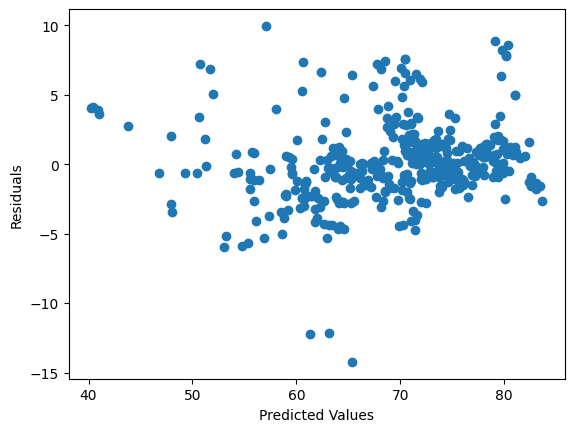

In [ ]:
# Using user defined function to run model ridge regression with best variables selected by the SelectPercentile method. 

# Tune alpha values
alphas = np.linspace(0.01,.3,3) 

# After tuning, selected the best alpha to run model on.
for a in [.1]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, df3BestVars, Ridge(alpha=a, normalize=True))

#### Random Forest Regression

R2 on Training: 0.9944944920447153
R2 on Test:     0.9616301335317168 

Difference:  0.032864358512998515 

RMSE on Training: 0.39550725632653255
RMSE on Test:     3.1957586528117417


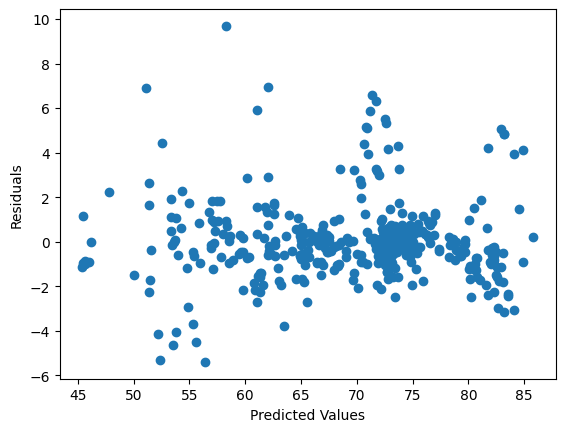

In [ ]:
X, y = runModel(varname, df3, RandomForestRegressor(random_state=210))

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
y = df3['Life expectancy ']
X = df3.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['mse', 'mae']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(RandomForestRegressor(), gridDict, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_) 

{'criterion': 'mse', 'max_depth': 6, 'min_samples_split': 5}


R2 on Training: 0.9710270386088784
R2 on Test:     0.9478560293393569 

Difference:  0.023171009269521536 

RMSE on Training: 2.0813731558516078
RMSE on Test:     4.34297955059232


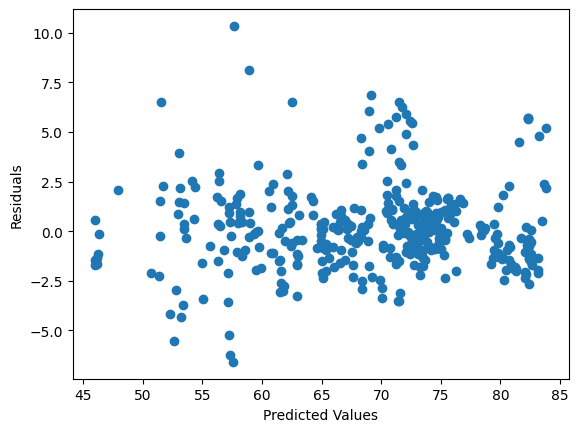

In [ ]:
X, y = runModel(varname, df3, RandomForestRegressor(max_depth = 6, min_samples_split = 10, criterion = 'mse', random_state=210))

Overall, the best regression model to predict life expectancy is the random forest regression model using the default hyperparameters. All of the data features were included as the random forest regression models can handle multicollinearity. The model does not appear to overfit the training set. The random forest testing set R$^2$ is significantly higher than the other regressions.

### Developing v.s. Developed

In [ ]:
# Create seperate data frames for developed and developing countries
dfDeveloping = df3.loc[df3['Status_Developed']==0]
dfDeveloped = df3.loc[df3['Status_Developed']==1]

dfDeveloping = dfDeveloping.drop(columns=['Status_Developed'],axis=1)
dfDeveloped = dfDeveloped.drop(columns=['Status_Developed'],axis=1)

Creating seperate data frame for developing and developed countries. The remaing dummy variable for the country's status is dropped as no longer relevant. 

In [ ]:
dfDeveloping.describe()  # Obtain summary of variables for developing countries.

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
count,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1.392000e+03,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000,1392.000000
mean,67.869109,38.382902,3.507708,362.936043,77.698276,2552.062500,35.799497,52.155172,5.755819,1.959195,3271.885450,1.583364e+07,5.425000,5.486638,0.597246,11.539296,209.915244,86.681753,86.759339
std,8.199598,130.705042,3.339707,872.139107,26.196916,10917.492271,19.103296,176.164223,2.183794,5.312611,5951.771855,7.627422e+07,4.743933,4.798355,0.175003,2.502672,107.925055,13.283125,13.257511
min,44.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,0.740000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,56.540000,23.000000,19.000000
25%,63.000000,1.000000,0.547500,30.424325,72.000000,0.000000,18.800000,1.000000,4.290000,0.100000,413.798663,1.829220e+05,1.900000,1.975000,0.486000,10.000000,135.375000,80.000000,81.000000
50%,69.300000,6.000000,2.690000,93.436768,88.000000,15.000000,37.050000,7.000000,5.600000,0.100000,1229.536399,1.383743e+06,3.850000,3.800000,0.641000,11.800000,185.100000,91.000000,91.000000
75%,73.900000,28.000000,5.782500,365.046065,96.000000,495.000000,52.800000,39.000000,7.000000,1.000000,3851.911772,8.199150e+06,7.600000,7.600000,0.717000,13.100000,261.225000,97.000000,96.000000
max,89.000000,1600.000000,17.870000,9748.636237,99.000000,131441.000000,77.100000,2100.000000,14.390000,43.500000,52496.694870,1.293859e+09,27.200000,28.200000,0.912000,17.300000,696.900000,99.000000,99.000000


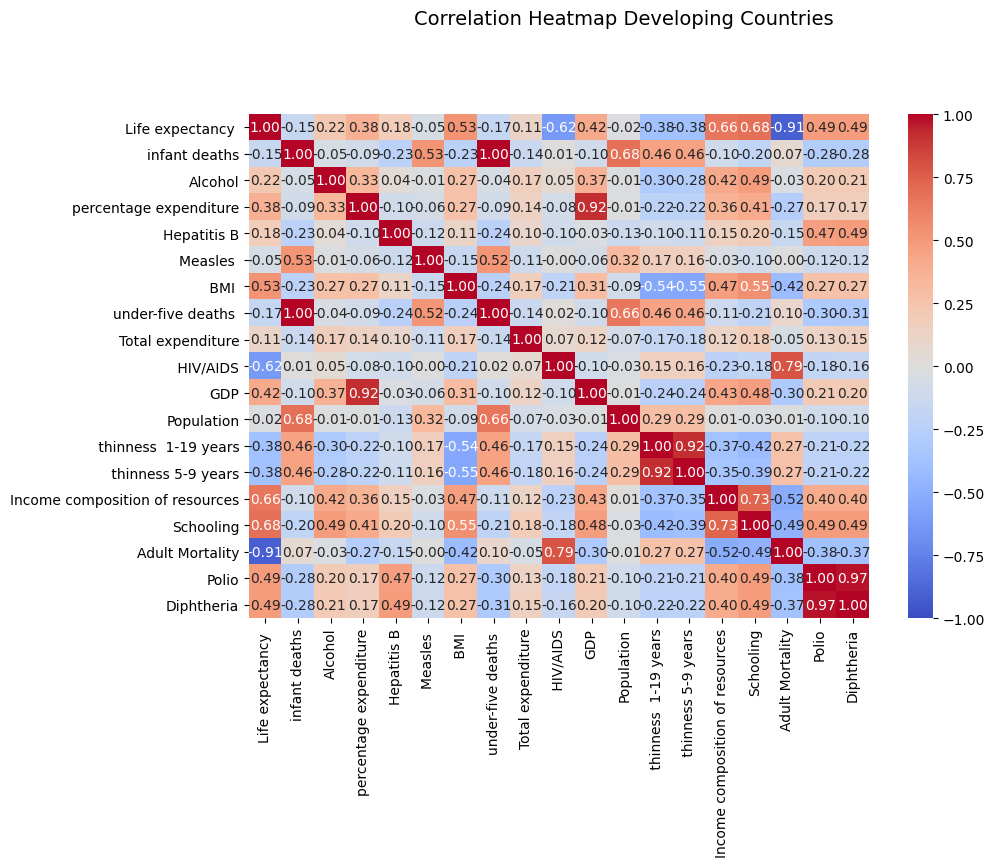

In [ ]:
# Display heatmap for developing countries

f, ax = plt.subplots(figsize=(10, 7))
corr = dfDeveloping.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developing Countries', fontsize=14)
plt.show()

In [ ]:
dfDeveloped.describe()  # Obtain summary of variables for developed countries.

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02,242.000000,2.420000e+02,242.00000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,78.691736,0.871901,10.436198,2656.821613,87.880165,474.933884,52.336777,1.086777,7.023099,1.000000e-01,18976.931845,8.744688e+06,1.43595,1.460744,0.836161,15.573554,104.332025,94.814050,94.962810
std,4.273485,1.079859,2.289144,3501.026685,19.578920,1914.706141,17.686432,1.274027,2.644588,3.059441e-16,22005.588976,1.774257e+07,0.88143,0.971582,0.052417,1.761778,48.860521,4.640894,4.548797
min,69.900000,0.000000,0.010000,1.576409,2.000000,0.000000,5.100000,0.000000,1.100000,1.000000e-01,12.277330,1.141000e+03,0.30000,0.200000,0.703000,11.500000,53.080000,71.000000,72.000000
25%,75.550000,0.000000,9.620000,333.897199,88.000000,0.250000,54.925000,0.000000,6.170000,1.000000e-01,3354.536509,3.305300e+05,0.70000,0.625000,0.800000,14.300000,66.620000,94.000000,94.000000
50%,78.950000,0.000000,10.805000,1119.010197,95.000000,12.500000,58.100000,1.000000,7.405000,1.000000e-01,11783.268730,1.553068e+06,1.00000,1.000000,0.836000,15.600000,83.775000,96.000000,96.000000
75%,81.400000,2.000000,11.960000,3699.744904,96.000000,116.500000,61.075000,2.000000,8.775000,1.000000e-01,28542.393630,7.383781e+06,2.17500,2.200000,0.876750,16.300000,141.125000,97.000000,98.000000
max,89.000000,4.000000,15.190000,18961.348600,99.000000,22004.000000,69.200000,5.000000,11.970000,1.000000e-01,119172.741800,8.253418e+07,4.00000,4.300000,0.936000,20.700000,245.600000,99.000000,99.000000


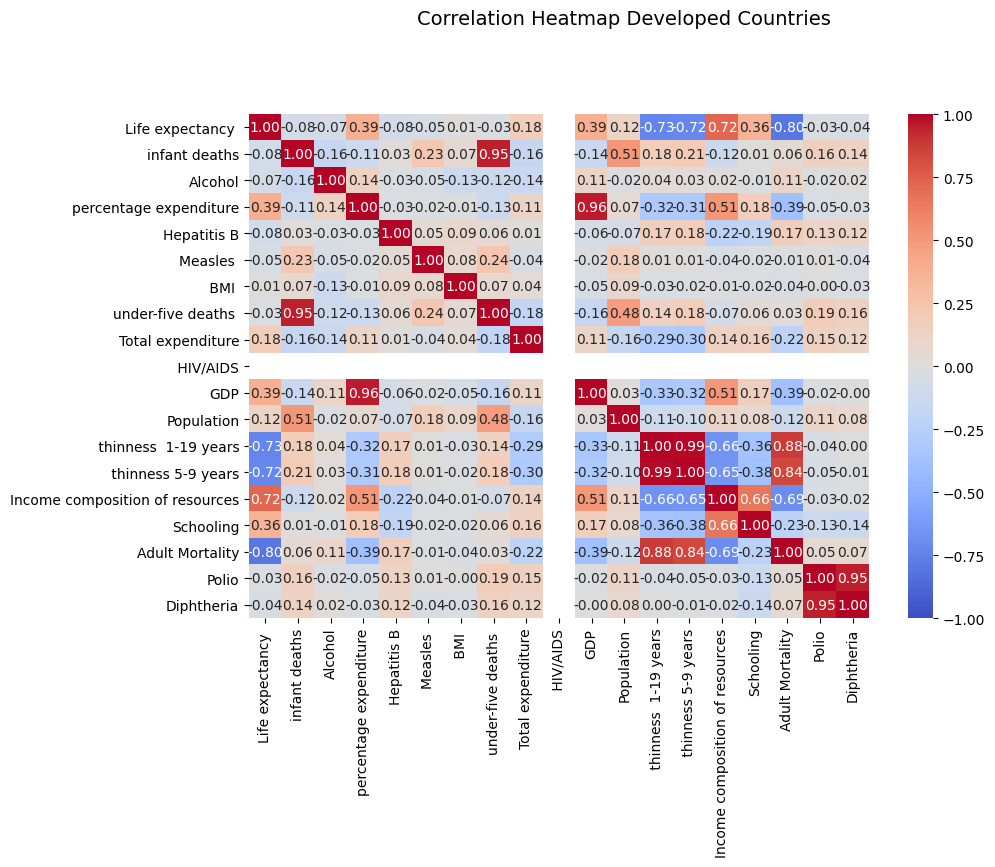

In [ ]:
# Display heatmap for developed countries

f, ax = plt.subplots(figsize=(10, 7))
corr = dfDeveloped.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developed Countries', fontsize=14)
plt.show()

Something is wrong with the developed country's HIV/AIDS row/column. 

In [ ]:
dfDeveloped[' HIV/AIDS'].unique()

array([0.1])

Developed countries only have one unique value for HIV/AIDS. This is either due to an error in the data or developed countries have so low cases of HIV/AIDs deaths per 1000 live births (0-4 years). If this is an error, it needs to be dropped for classification otherwise everything with the value 0.1 will be classified as developed. This does not affect the regression analysis for the seperate data frames, but could effect the regression analysis using the entire data frame. We should try to investigate further to determine if this is an error or not.

In [ ]:
# Dropping HIV/AIDs per the previous discussion about possible error. 

df3Classify = df3.drop(columns = [' HIV/AIDS'], axis=1)

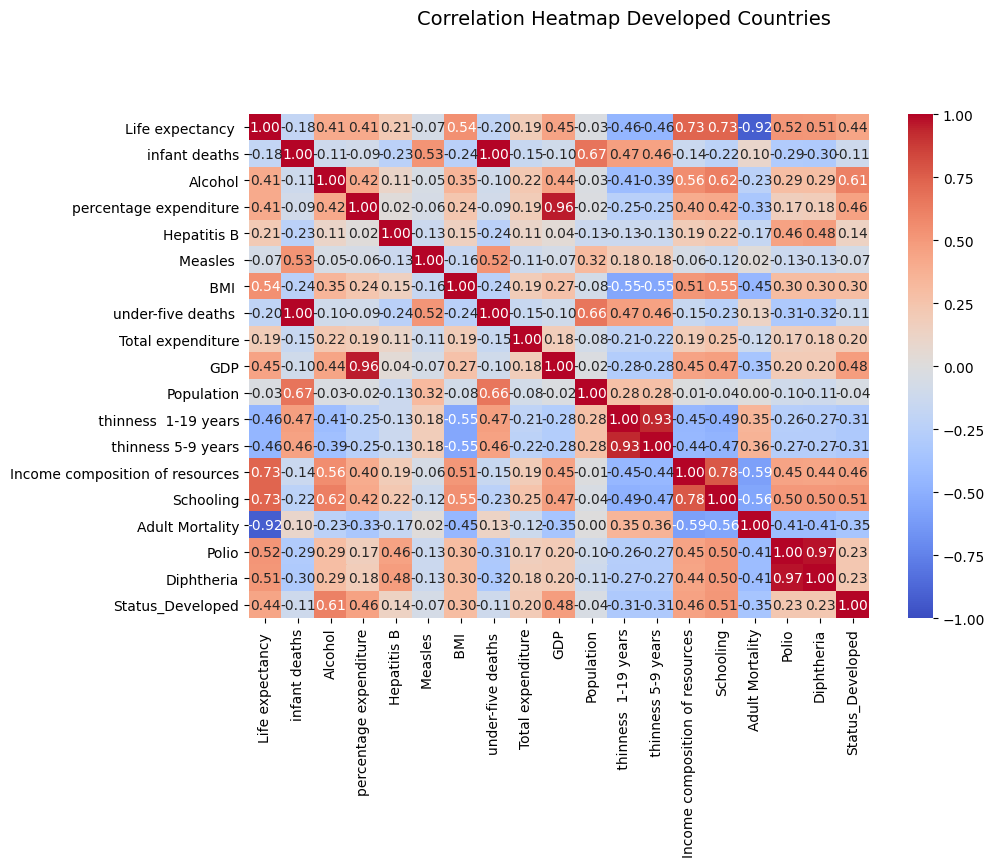

In [ ]:
# Display heatmap for developed countries

f, ax = plt.subplots(figsize=(10, 7))
corr = df3Classify.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Correlation Heatmap Developed Countries', fontsize=14)
plt.show()

The heatmap for developed countries shows a lot more gray than the heatmap for developing countries and the entire dataset. More gray indicated more uncorrelated variables and explains why regression analysis has a harder time achieving a high R$^2$ with developed countries comparted to developing countries. 

### Developing Data Frame

Repeating regression analysis conducted on the entire data set on the developing countries data set. 

#### Linear Regression with all features

R2 on Training: 0.9183251130960314
R2 on Test:     0.9139852079623553 

Difference:  0.004339905133676103 

RMSE on Training: 5.465704211973976
RMSE on Test:     5.807827420383306


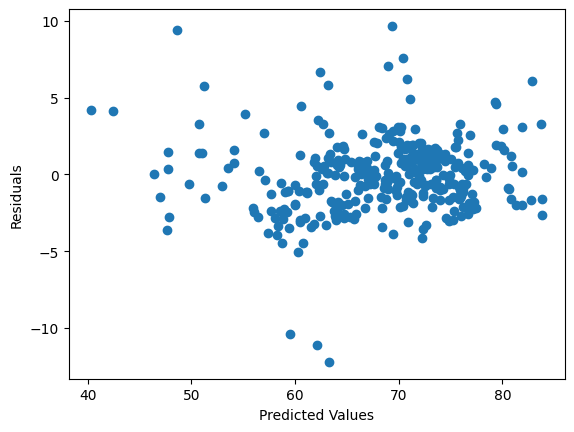

,VIF Factor,features
0,243.748080,infant deaths
1,3.154008,Alcohol
2,8.521150,percentage expenditure
3,13.914423,Hepatitis B
4,1.590624,Measles
5,8.204026,BMI
6,233.553051,under-five deaths
7,8.453557,Total expenditure
8,2.847969,HIV/AIDS
9,10.060098,GDP


In [ ]:
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, dfDeveloping, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

Again, a significant number of variables have variance inflation factors over 10 indiciting the model with all the variables suffer from multicollinearity.

In [ ]:
# Display best predictors for developing countries.
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds

Best predictors of Life Expectancy by Country Type 



,Variable,Score
15,Adult Mortality,6781.412
14,Schooling,1163.920
13,Income composition of resources,1046.294
8,HIV/AIDS,860.802
5,BMI,532.034
16,Polio,448.916
17,Diphtheria,435.401
9,GDP,300.012
2,percentage expenditure,236.185
11,thinness 1-19 years,229.361


R2 on Training: 0.9176191612951445
R2 on Test:     0.913327782000305 

Difference:  0.004291379294839581 

RMSE on Training: 5.512946686103073
RMSE on Test:     5.852217651863453 

[(0.0035523707015091997, 'infant deaths'), (0.13700189093138154, 'Alcohol'), (0.0003294158197480561, 'percentage expenditure'), (-0.00523324913045268, 'Hepatitis B'), (-3.144887407781014e-06, 'Measles '), (0.020005923626796932, ' BMI '), (-0.0037725129054464964, 'under-five deaths '), (0.028203627542518567, 'Total expenditure'), (0.10355999949622838, ' HIV/AIDS'), (1.255840863970488e-05, 'GDP'), (2.626275380522999e-09, 'Population'), (-0.04334740221071842, ' thinness  1-19 years'), (0.0005446177474708591, ' thinness 5-9 years'), (2.5588937450931213, 'Income composition of resources'), (0.39552734809411266, 'Schooling'), (-0.059967726814509965, 'Adult Mortality'), (0.042928134214046614, 'Polio'), (0.010369108204204504, 'Diphtheria')]
There are 18 independent variables in the model. 

_________________________

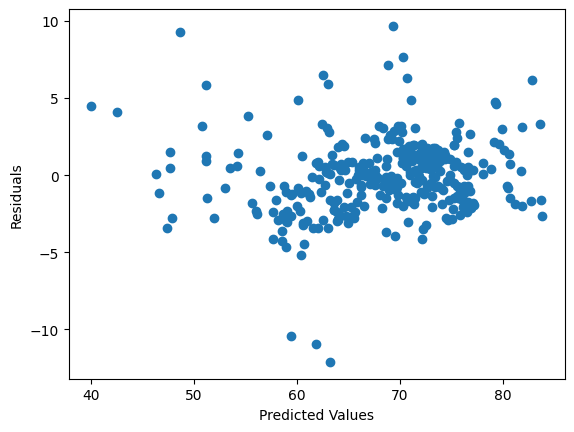

R2 on Training: 0.6603963854488617
R2 on Test:     0.6593280942028882 

Difference:  0.0010682912459735183 

RMSE on Training: 22.7263602903569
RMSE on Test:     23.002597448317704 

[(-0.00024219297400685286, 'infant deaths'), (0.024007563899547224, 'Alcohol'), (0.00040989734063000076, 'percentage expenditure'), (0.0031794284981581417, 'Hepatitis B'), (2.345960213946703e-06, 'Measles '), (0.026836218837663486, ' BMI '), (-0.00038144790550674097, 'under-five deaths '), (0.035412009075651854, 'Total expenditure'), (-0.1514512815220169, ' HIV/AIDS'), (6.54412719808735e-05, 'GDP'), (8.376571738906164e-10, 'Population'), (-0.05667559237889954, ' thinness  1-19 years'), (-0.05413531905113228, ' thinness 5-9 years'), (3.691097222226667, 'Income composition of resources'), (0.2718820189688229, 'Schooling'), (-0.01131220152118963, 'Adult Mortality'), (0.03445789008400113, 'Polio'), (0.033404613413534304, 'Diphtheria')]
There are 18 independent variables in the model. 

________________________

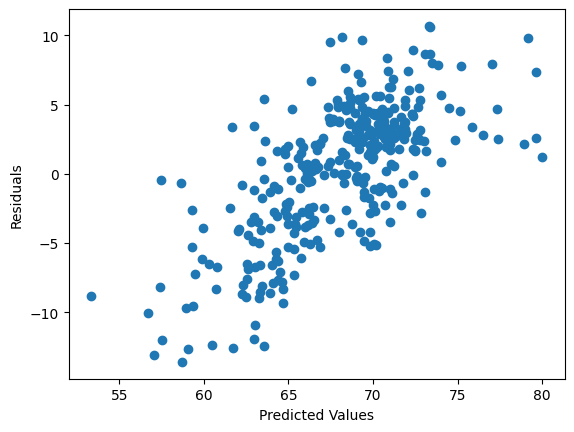

R2 on Training: 0.5113772745382561
R2 on Test:     0.5102222519156752 

Difference:  0.0011550226225809368 

RMSE on Training: 32.698757107096625
RMSE on Test:     33.07041228411972 

[(-0.0003486891296707133, 'infant deaths'), (0.026470607400941322, 'Alcohol'), (0.00031117145135639655, 'percentage expenditure'), (0.0031760518371711606, 'Hepatitis B'), (3.216029672587382e-07, 'Measles '), (0.019481664717218388, ' BMI '), (-0.00038212771676725965, 'under-five deaths '), (0.028332656720555852, 'Total expenditure'), (-0.09913239760524677, ' HIV/AIDS'), (4.979550034682007e-05, 'GDP'), (3.762698432153309e-10, 'Population'), (-0.04618477597651409, ' thinness  1-19 years'), (-0.04456067633838399, ' thinness 5-9 years'), (2.6184733660854462, 'Income composition of resources'), (0.19205496348185905, 'Schooling'), (-0.00719884711100612, 'Adult Mortality'), (0.025332239849395775, 'Polio'), (0.024734486849191148, 'Diphtheria')]
There are 18 independent variables in the model. 

___________________

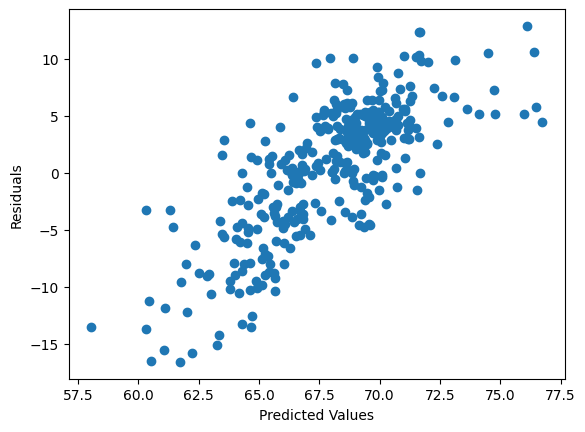

R2 on Training: 0.41614643977822396
R2 on Test:     0.4141653599455949 

Difference:  0.0019810798326290735 

RMSE on Training: 39.07162879860814
RMSE on Test:     39.55629497806927 

[(-0.0003447341985788089, 'infant deaths'), (0.023856008994655033, 'Alcohol'), (0.00024808098155627454, 'percentage expenditure'), (0.002772699677009378, 'Hepatitis B'), (-3.127428272073e-07, 'Measles '), (0.015266127310790568, ' BMI '), (-0.00034554845691497525, 'under-five deaths '), (0.023514412915943493, 'Total expenditure'), (-0.07380620038412637, ' HIV/AIDS'), (3.970920115805401e-05, 'GDP'), (1.9482105450477253e-10, 'Population'), (-0.03798443731172703, ' thinness  1-19 years'), (-0.03675571075015587, ' thinness 5-9 years'), (2.029921680719138, 'Income composition of resources'), (0.1490203546158815, 'Schooling'), (-0.005327563871738051, 'Adult Mortality'), (0.019952363641161767, 'Polio'), (0.019540689470963497, 'Diphtheria')]
There are 18 independent variables in the model. 

______________________

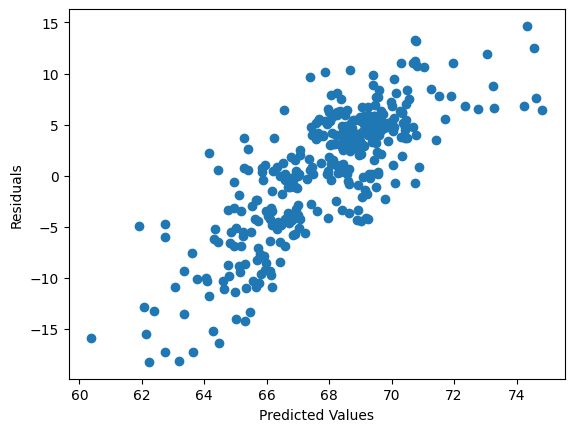

R2 on Training: 0.35051289626297033
R2 on Test:     0.34770494416851705 

Difference:  0.002807952094453281 

RMSE on Training: 43.46384222964587
RMSE on Test:     44.043786210405884 

[(-0.00031935518381122726, 'infant deaths'), (0.021042773142800637, 'Alcohol'), (0.00020576901515805544, 'percentage expenditure'), (0.0024086240902616986, 'Hepatitis B'), (-5.405508550038565e-07, 'Measles '), (0.01254859210693435, ' BMI '), (-0.0003076756341393244, 'under-five deaths '), (0.020018905534788207, 'Total expenditure'), (-0.05884579184403298, ' HIV/AIDS'), (3.293641540424869e-05, 'GDP'), (1.089616426364669e-10, 'Population'), (-0.03207031690289896, ' thinness  1-19 years'), (-0.031075517512862232, ' thinness 5-9 years'), (1.6580743219462153, 'Income composition of resources'), (0.12186071186103282, 'Schooling'), (-0.004239591831640659, 'Adult Mortality'), (0.01644600975423465, 'Polio'), (0.016133878941080346, 'Diphtheria')]
There are 18 independent variables in the model. 

_________________

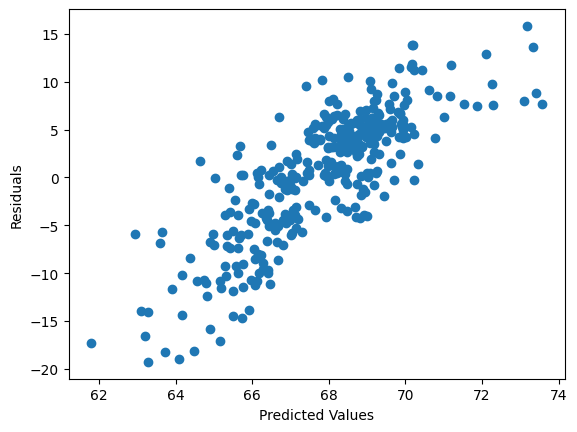

In [ ]:
# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,5) 

for a in alphas:
    X, y = runRegularizationModel(varname, dfDeveloping, Ridge(alpha=a, normalize=True))

The residual and fitted values become more correlated as lambda increases, violating the linear regression assumptions.  

The alpha value is  6.57
R2 on Training: 0.8865221807465308
R2 on Test:     0.8720448691910916 

Difference:  0.014477311555439187 

RMSE on Training: 7.593964536352122
RMSE on Test:     8.639692077212397 

[(-0.0, 'infant deaths'), (0.0, 'Alcohol'), (0.0, 'percentage expenditure'), (0.0, 'Hepatitis B'), (1.9993747027751895e-06, 'Measles '), (0.03512776976005565, ' BMI '), (-0.002886725761647183, 'under-five deaths '), (0.0, 'Total expenditure'), (0.0, ' HIV/AIDS'), (0.000186998664185844, 'GDP'), (4.414766207782396e-09, 'Population'), (-0.0, ' thinness  1-19 years'), (-0.0, ' thinness 5-9 years'), (0.0, 'Income composition of resources'), (0.0, 'Schooling'), (-0.060048202993307376, 'Adult Mortality'), (0.04190490308996255, 'Polio'), (0.0, 'Diphtheria')]
There are 7 independent variables in the model. 

______________________________________________________


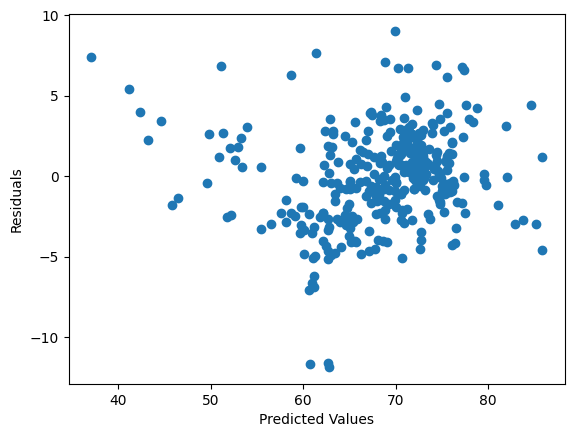

In [ ]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,13,100) 
#alphas = np.linspace(6.56936,6.56939,1000)

# After tuning, selected the best alpha to run model on.
for a in [6.57]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDeveloping, Lasso(alpha=a, max_iter=10000))

I first tune the alpha/lambda hyper-parameter over a larger range. Once I narrowed down where the optimal lambda value was located, I tighten the range and tuned the parameter again to find the local optimal in the smaller range. 

#### Linear Regression with lasso selected features

The alpha value is  0.14
R2 on Training: 0.883329737657495
R2 on Test:     0.8634715017903813 

Difference:  0.01985823586711366 

RMSE on Training: 7.807603640116617
RMSE on Test:     9.218576674795026 

[(6.5957967625325935e-06, 'Measles '), (0.06466391345745114, ' BMI '), (-0.0013067891569414616, 'under-five deaths '), (0.00017536028782681078, 'GDP'), (2.9359217795368202e-09, 'Population'), (-0.04944805999002114, 'Adult Mortality'), (0.09396758100582876, 'Polio')]
There are 7 independent variables in the model. 

______________________________________________________


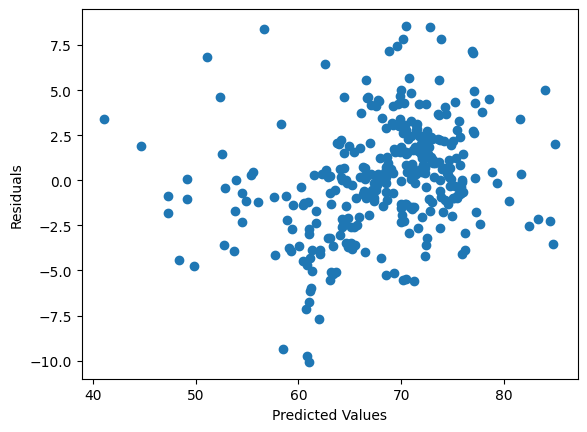

In [ ]:
lassoVars = ['Measles ', ' BMI ', 'under-five deaths ', 'GDP', 'Population', 'Adult Mortality', 'Polio', 'Life expectancy '] 
dfDevelopingLassoVars = dfDeveloping[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [0.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopingLassoVars, Ridge(alpha=a, normalize=True))

#### Linear Regression with SelectPercentile method selected features

In [ ]:
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Income composition of resources', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
dfDevelopingBestVars = dfDeveloping[bestVars]

y = dfDevelopingBestVars['Life expectancy ']
X = dfDevelopingBestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     3192.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        01:23:36   Log-Likelihood:                -2462.9
No. Observations:                1044   AIC:                             4934.
Df Residuals:                    1040   BIC:                             4954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,27.954877,Income composition of resources
1,32.678651,Schooling
2,3.169566,Adult Mortality


Ridge regression will be used to handle the multicollinearity in the preceding model. 

The alpha value is  0.1
R2 on Training: 0.8968083414332574
R2 on Test:     0.8956851549156045 

Difference:  0.0011231865176528633 

RMSE on Training: 6.905612046111323
RMSE on Test:     7.0434701204536925 

[(5.618233126984162, 'Income composition of resources'), (0.7446038930827554, 'Schooling'), (-0.050665089864652554, 'Adult Mortality')]
There are 3 independent variables in the model. 

______________________________________________________


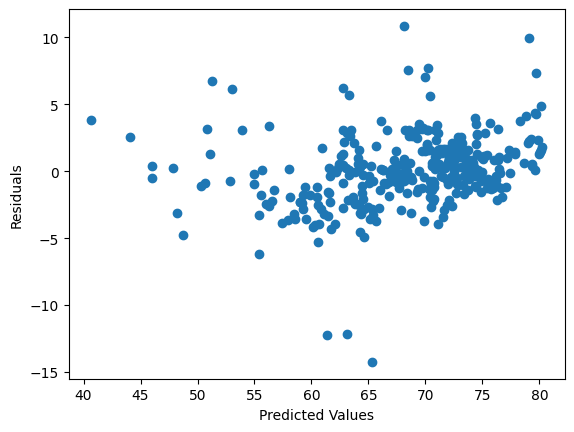

In [ ]:
# Using user defined function to run model ridge regression with best variables selected by the SelectPercentile method. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.1]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopingBestVars, Ridge(alpha=a, normalize=True))

#### Random Forest Regression

R2 on Training: 0.9943530556293566
R2 on Test:     0.963484622228808 

Difference:  0.030868433400548567 

RMSE on Training: 0.37789495402298984
RMSE on Test:     2.4655644367816163


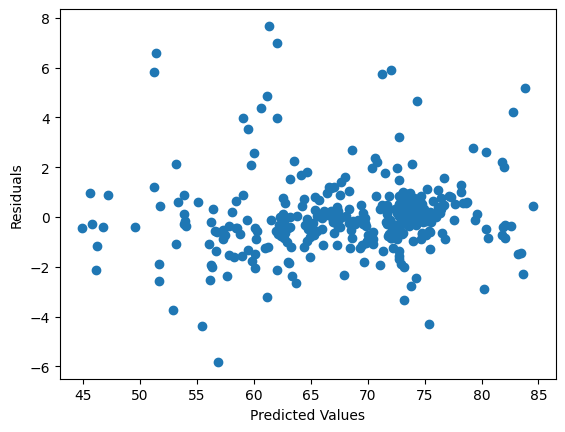

In [ ]:
X, y = runModel(varname, dfDeveloping, RandomForestRegressor(random_state=210))

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
y = dfDeveloping['Life expectancy ']
X = dfDeveloping.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['mse', 'mae']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(RandomForestRegressor(), gridDict, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_) 

{'criterion': 'mse', 'max_depth': 6, 'min_samples_split': 5}


R2 on Training: 0.9721860528572455
R2 on Test:     0.9521160297315077 

Difference:  0.0200700231257378 

RMSE on Training: 1.8613164194340386
RMSE on Test:     3.2331861640781048


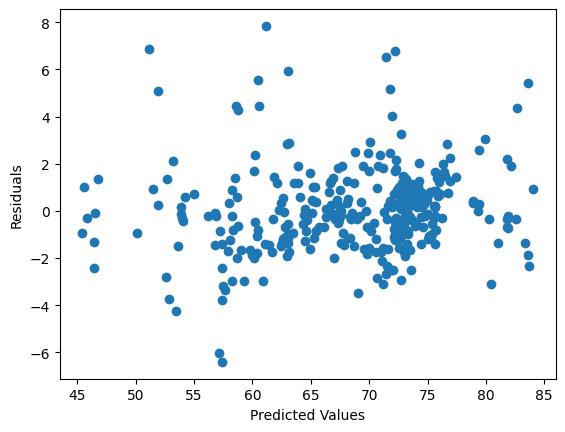

In [ ]:
X, y = runModel(varname, dfDeveloping, RandomForestRegressor(max_depth = 6, min_samples_split = 10, criterion = 'mse', random_state=210))

The results for the developing country subset are very similar to the results for the entire data set. The large class imbalance between developing and developed countries is causing the developing countries to dominate the results of the entire data set. 

The best regression model to predict life expectancy for developing countries is the random forest model using the default hyperparameters. The results are very similar to the results of random forest regression on the entire dataset. The same predictors were used for the developing subset as the entire dataset. There were no concerns of overfitting as the training and testing set were relatively close to each other. 

### Developed Data Frame

Repearing regression analysis conducted on the entire data set on the developing countries data set. 

#### Linear Regression with all features

R2 on Training: 0.693171018521277
R2 on Test:     0.730778806459329 

Difference:  -0.03760778793805197 

RMSE on Training: 5.352593135787567
RMSE on Test:     5.464319112732047


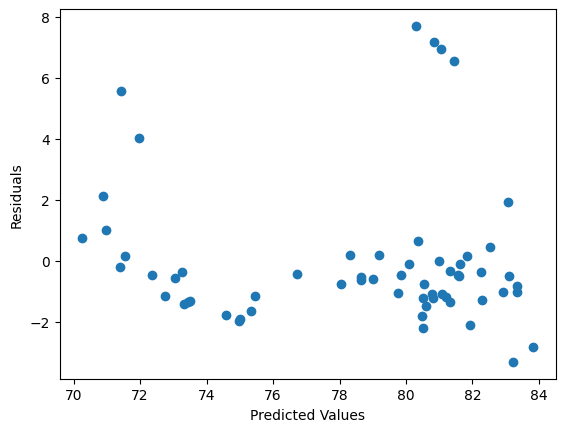

,VIF Factor,features
0,13.096038,infant deaths
1,1.199296,Alcohol
2,13.880516,percentage expenditure
3,1.139853,Hepatitis B
4,1.110818,Measles
5,1.067001,BMI
6,12.748284,under-five deaths
7,1.309831,Total expenditure
8,1296.009957,HIV/AIDS
9,13.996184,GDP


In [ ]:
# Using user defined function to run model linear regression and print results. 

X, y = runModel(varname, dfDeveloped, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

In [ ]:
# Display best predictors for developed countries,
preds = predictors(100, X, y, longname)

print('Best predictors of', longname,'\n')
preds

Best predictors of Life Expectancy by Country Type 



,Variable,Score
15,Adult Mortality,422.314
11,thinness 1-19 years,281.683
13,Income composition of resources,260.289
12,thinness 5-9 years,253.770
2,percentage expenditure,43.565
9,GDP,42.256
14,Schooling,35.074
7,Total expenditure,7.959
10,Population,3.681
0,infant deaths,1.521


R2 on Training: 0.6236079704144286
R2 on Test:     0.6975273979032126 

Difference:  -0.073919427488784 

RMSE on Training: 6.566111793662451
RMSE on Test:     6.139215115193311 

[(-0.048606185406988245, 'infant deaths'), (-0.04378057852815643, 'Alcohol'), (5.080418729546389e-05, 'percentage expenditure'), (0.007194966073583397, 'Hepatitis B'), (-5.2095464222184234e-05, 'Measles '), (0.0015918405121138125, ' BMI '), (0.07028971730842477, 'under-five deaths '), (-0.008773001357076914, 'Total expenditure'), (-14.937360930050813, ' HIV/AIDS'), (6.883016908519568e-06, 'GDP'), (5.286727287491266e-10, 'Population'), (-0.6705580344317625, ' thinness  1-19 years'), (-0.5771052341872852, ' thinness 5-9 years'), (13.759447232331008, 'Income composition of resources'), (0.11916728367507538, 'Schooling'), (-0.017742361253957187, 'Adult Mortality'), (-0.012762740794655947, 'Polio'), (-0.012955568083741724, 'Diphtheria')]
There are 18 independent variables in the model. 

__________________________

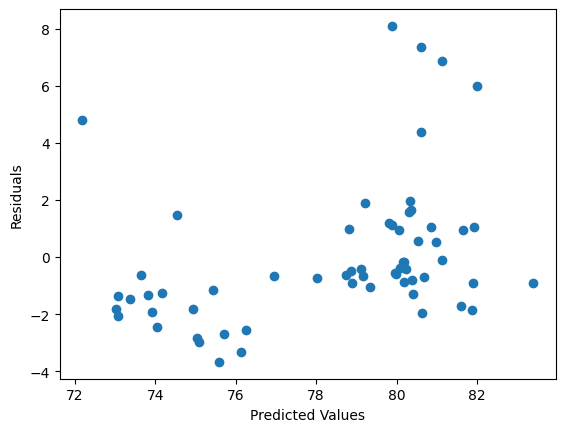

R2 on Training: 0.6236079704144286
R2 on Test:     0.6975273979032126 

Difference:  -0.073919427488784 

RMSE on Training: 6.566111793662451
RMSE on Test:     6.139215115193311 

[(-0.048606185406988245, 'infant deaths'), (-0.04378057852815643, 'Alcohol'), (5.080418729546389e-05, 'percentage expenditure'), (0.007194966073583397, 'Hepatitis B'), (-5.2095464222184234e-05, 'Measles '), (0.0015918405121138125, ' BMI '), (0.07028971730842477, 'under-five deaths '), (-0.008773001357076914, 'Total expenditure'), (-14.937360930050813, ' HIV/AIDS'), (6.883016908519568e-06, 'GDP'), (5.286727287491266e-10, 'Population'), (-0.6705580344317625, ' thinness  1-19 years'), (-0.5771052341872852, ' thinness 5-9 years'), (13.759447232331008, 'Income composition of resources'), (0.11916728367507538, 'Schooling'), (-0.017742361253957187, 'Adult Mortality'), (-0.012762740794655947, 'Polio'), (-0.012955568083741724, 'Diphtheria')]
There are 18 independent variables in the model. 

__________________________

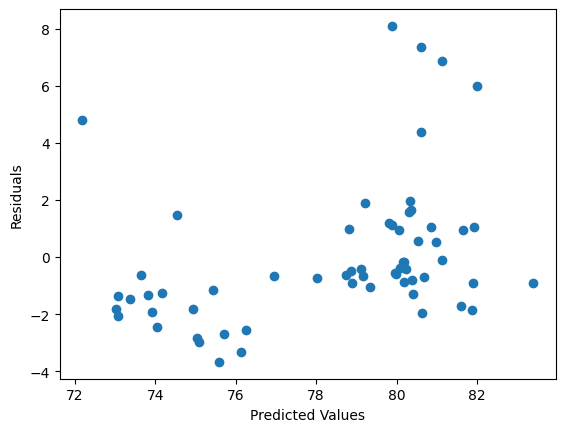

R2 on Training: 0.6236079704144286
R2 on Test:     0.6975273979032126 

Difference:  -0.073919427488784 

RMSE on Training: 6.566111793662451
RMSE on Test:     6.139215115193311 

[(-0.048606185406988245, 'infant deaths'), (-0.04378057852815643, 'Alcohol'), (5.080418729546389e-05, 'percentage expenditure'), (0.007194966073583397, 'Hepatitis B'), (-5.2095464222184234e-05, 'Measles '), (0.0015918405121138125, ' BMI '), (0.07028971730842477, 'under-five deaths '), (-0.008773001357076914, 'Total expenditure'), (-14.937360930050813, ' HIV/AIDS'), (6.883016908519568e-06, 'GDP'), (5.286727287491266e-10, 'Population'), (-0.6705580344317625, ' thinness  1-19 years'), (-0.5771052341872852, ' thinness 5-9 years'), (13.759447232331008, 'Income composition of resources'), (0.11916728367507538, 'Schooling'), (-0.017742361253957187, 'Adult Mortality'), (-0.012762740794655947, 'Polio'), (-0.012955568083741724, 'Diphtheria')]
There are 18 independent variables in the model. 

__________________________

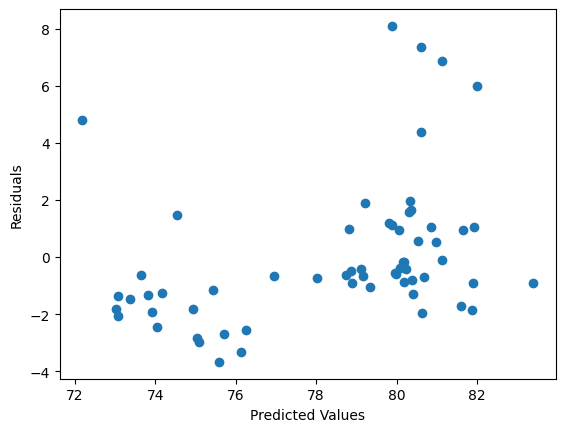

In [ ]:
# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,1,3) 

for a in alphas:
    X, y = runRegularizationModel(varname, dfDeveloped, Ridge(normalize=True))

Ridge regression causes a downwards shift in the points between predicted values of 70 and 77. The shift creates a pattern in the residual graph that violate the assumptions of linear regression. 

The alpha value is  0.73
R2 on Training: 0.6484386287643852
R2 on Test:     0.7404278276774612 

Difference:  -0.091989198913076 

RMSE on Training: 6.132944070064344
RMSE on Test:     5.268475203238974 

[(-0.0, 'infant deaths'), (0.0, 'Alcohol'), (9.537485477039902e-05, 'percentage expenditure'), (0.01473566050317122, 'Hepatitis B'), (-0.00010800302382010735, 'Measles '), (-0.0, ' BMI '), (0.0, 'under-five deaths '), (-0.0, 'Total expenditure'), (-0.0, ' HIV/AIDS'), (-6.5602670232707795e-06, 'GDP'), (-7.70363475564277e-10, 'Population'), (-0.0, ' thinness  1-19 years'), (-0.0, ' thinness 5-9 years'), (0.0, 'Income composition of resources'), (0.23152912643250553, 'Schooling'), (-0.06745447639895372, 'Adult Mortality'), (-0.0, 'Polio'), (-0.0, 'Diphtheria')]
There are 7 independent variables in the model. 

______________________________________________________


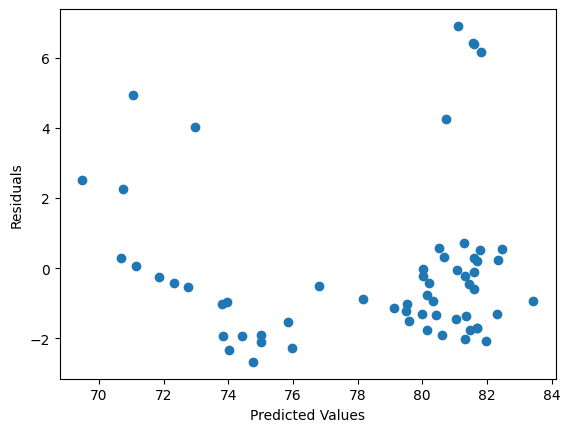

In [ ]:
# Using user defined function to run model Lasso regression and print results. 

# Tune alpha values
#alphas = np.linspace(0.01,20,100) 
alphas = np.linspace(0.62,.81,1000)

# After tuning, selected the best alpha to run model on.
for a in [.73]:
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDeveloped, Lasso(alpha=a, max_iter=10000))

The fit of the Lasso model is hard to determine because the testing set's R$^2$ is significantly large than the training set's. There seem to be two groupings of outliers around predicted values of 71 and 82. The testing set's R$^2$ did not appear to change much as the lambda values increased and the independent values dropped out. I, therefore, choose a lambda value that minimized the number of independent variables while keeping the R$^2$ for the testing and training set within 10 percentage points of each other. 

#### Linear Regression with lasso selected features

The alpha value is  0.14
R2 on Training: 0.6500888344672551
R2 on Test:     0.7356534653529159 

Difference:  -0.0855646308856608 

RMSE on Training: 6.104156438350906
RMSE on Test:     5.365379310074008 

[(5.574155859284912e-05, 'percentage expenditure'), (0.015233683133629907, 'Hepatitis B'), (-9.301434806766448e-05, 'Measles '), (4.482626977830398e-06, 'GDP'), (9.987941735857367e-11, 'Population'), (0.47068207840467435, 'Schooling'), (-0.056471489472552885, 'Adult Mortality')]
There are 7 independent variables in the model. 

______________________________________________________


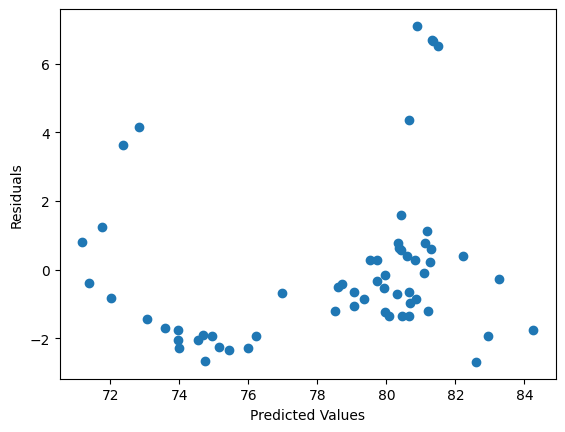

In [ ]:
# Re-run ridge regression with Lasso selected variables

lassoVars = ['percentage expenditure', 'Hepatitis B', 'Measles ', 'GDP', 'Population', 'Schooling', 'Adult Mortality', 'Life expectancy '] 
dfDevelopedLassoVars = dfDeveloped[lassoVars]

# Using user defined function to run model ridge regression and print results. 

# Tune alpha values
alphas = np.linspace(0.01,13,100) 

# After tuning, selected the best alpha to run model on.
for a in [.14]:  # The alpha with a good residual plot was choosen as R-square decreased as alpha increased
    print('The alpha value is ', a)
    X, y = runRegularizationModel(varname, dfDevelopedLassoVars, Ridge(alpha=a, normalize=True))

#### Linear Regression with SelectPercentile method selected features

In [ ]:
# Choosing the best predictors from the SelectPercentile method.
bestVars = ['Adult Mortality', 'Income composition of resources', 'Life expectancy '] 
dfDevelopedBestVars = dfDeveloped[bestVars]

y = dfDevelopedBestVars['Life expectancy ']
X = dfDevelopedBestVars.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     180.6
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.47e-43
Time:                        01:25:14   Log-Likelihood:                -415.28
No. Observations:                 181   AIC:                             836.6
Df Residuals:                     178   BIC:                             846.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

,VIF Factor,features
0,4.644674,Adult Mortality
1,4.644674,Income composition of resources


After removing insignificant variables based on their p-values, the model was left with only two independent variables. Trying these variables with ridge regression is not necessary because the model does not suffer from multicollinearity. 

R2 on Training: 0.6698313306292161
R2 on Test:     0.7449999411303658 

Difference:  -0.07516861050114976 

RMSE on Training: 5.759751066568408
RMSE on Test:     5.175676094083728


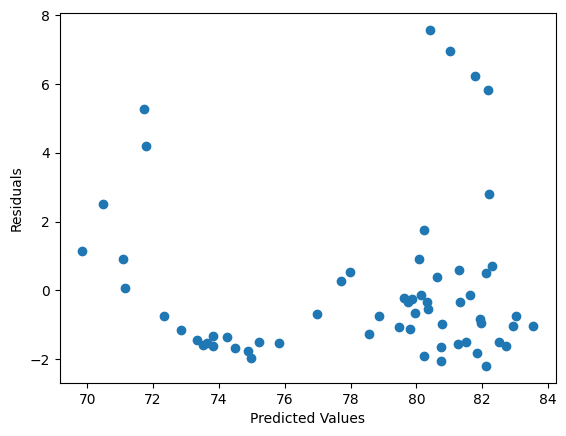

,VIF Factor,features
0,4.644674,Adult Mortality
1,4.644674,Income composition of resources


In [ ]:
X, y = runModel(varname, dfDevelopedBestVars, LinearRegression())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

I ran OLS using the user-defined function, runModel, to see the difference between the testing and training set's R$^2$ values. There is no need to try ridge regression using the predictors in the best OLS model because they do not suffer from multicollinearity. 

#### Random Forest Regression

R2 on Training: 0.9673531907177239
R2 on Test:     0.8349867384069701 

Difference:  0.13236645231075372 

RMSE on Training: 0.5695194972375672
RMSE on Test:     3.3492352786885244


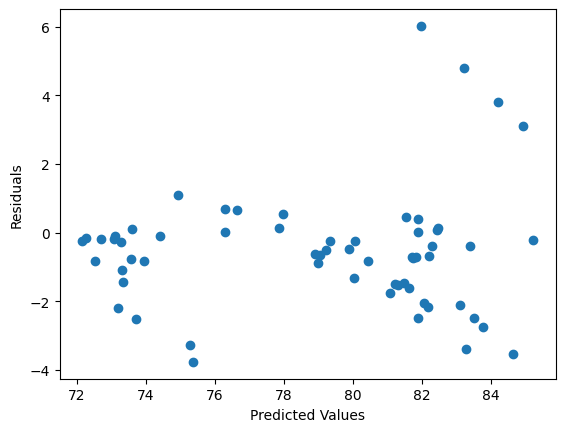

In [ ]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(random_state=210))

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
y = dfDeveloped['Life expectancy ']
X = dfDeveloped.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['mse', 'mae']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(RandomForestRegressor(), gridDict, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_) 

{'criterion': 'mae', 'max_depth': 6, 'min_samples_split': 5}


R2 on Training: 0.9226095615242227
R2 on Test:     0.8171673415496319 

Difference:  0.1054422199745908 

RMSE on Training: 1.3500665020776759
RMSE on Test:     3.7109113768601967


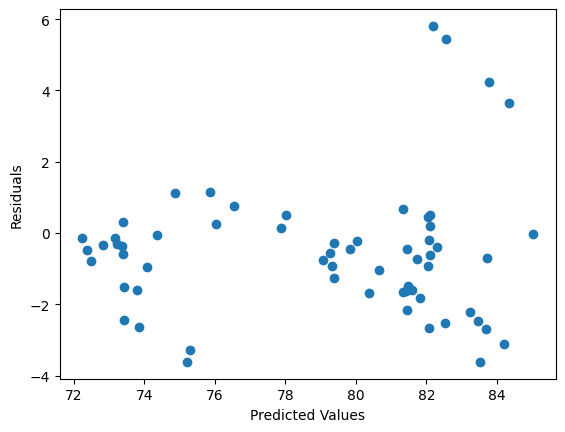

In [ ]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(max_depth = 5, min_samples_split = 5, criterion = 'mse', random_state=210))

R2 on Training: 0.8199676874733975
R2 on Test:     0.7953951691305082 

Difference:  0.024572518342889316 

RMSE on Training: 3.1406411337211892
RMSE on Test:     4.152816028982402


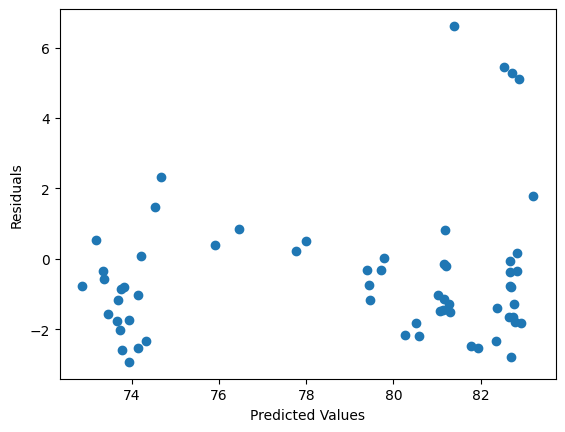

In [ ]:
X, y = runModel(varname, dfDeveloped, RandomForestRegressor(max_depth = 3, min_samples_split = 5, criterion = 'mse', random_state=210))

The random forest regression model again performed the best out of all the regression models tried on the developed data set. It does not overfit the data and achieves the best testing set R$^2$ value. It was also the only model where the testing set had a lower R$^2$ than the training set. 

Developed countries experienced lower R$^2$ and scores for the top predictors than regression analysis on the developing countries. The top five predictors are different between the developing and developed countries, indicating there is a difference between the two. 

### PCA Test

Trying PCA on the entire dataset to see if multicollinearity could be exploited and improve any of our results above.

#### PCA Test using Entire dataset

In [ ]:
#Use same split as before
y = df3['Life expectancy ']
X = df3.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [ ]:
# Initialize PCA keeping all components 
pca = PCA(n_components=None)

# Fit and transform the feature sets
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

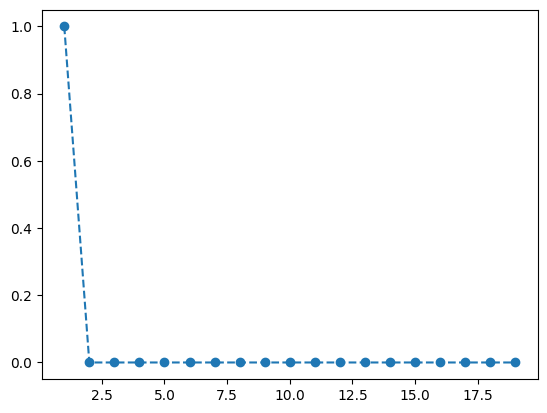

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Plot scree plot
y = pca.explained_variance_ratio_
x = np.arange(1, 20)
plt.plot(x,y, marker='o', linestyle='dashed') 
plt.show()

# Print cummulative variance explained by componets. 
print(pca.explained_variance_ratio_.cumsum().round(decimals=10))

In [ ]:
# Rerun PCA analysis and transformations keeping only one components. 
pca = PCA(n_components=6)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

The R² on the training data is 0.87.
The R² on the validation data is 0.86.
The Root Mean Squared Error on the training data is 3.03.
The Root Mean Squared Error on the validation data is 3.47.


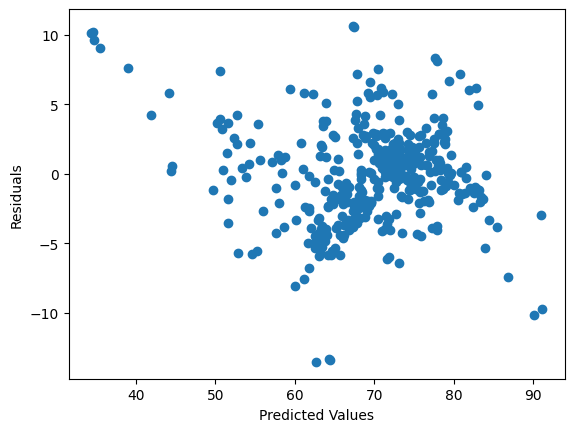

In [ ]:
# Intialize and fit the linear regression model with standard PCA using 6 components.   
linReg = LinearRegression()
linReg.fit(X_train_pca, y_train)

# Make prediction and get performance measures for training data.
regPredTrain = linReg.predict(X_train_pca)
rSquaredTraining = metrics.r2_score(y_train, regPredTrain)
trainRSME = metrics.mean_squared_error(y_train, regPredTrain)**(1/2)

# Make prediction and get performance measures for validation data.
regPredVal = linReg.predict(X_test_pca)
rSquaredVal = metrics.r2_score(y_test, regPredVal)
valRSME = metrics.mean_squared_error(y_test, regPredVal)**(1/2)

# print results from preceding regression analysis.
print('The R\u00b2 on the training data is ' + str(round(rSquaredTraining, 2)) + '.')
print('The R\u00b2 on the validation data is ' + str(round(rSquaredVal, 2)) + '.')
print('The Root Mean Squared Error on the training data is ' + str(round(trainRSME, 2)) + '.')
print('The Root Mean Squared Error on the validation data is ' + str(round(valRSME, 2)) + '.')


plt.scatter(regPredVal, (y_test - regPredVal))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Performing regression analysis on the PCA transformed data required 6 components to achieve a testing set R$^2$ relatively close to the regression results from the normal data. However, ridge regression on the normal data was able to achieve a higher  testing set R$^2$ with only three predictors. Performing PCA did not improve the results of our normal data and makes the results harder to explain. 

#### PCA Test using Developed Country Subset

In [ ]:
#Use same split as before
y = dfDeveloped['Life expectancy ']
X = dfDeveloped.drop(['Life expectancy '], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

In [ ]:
# Rerun PCA analysis and transformations keeping only one components. 
pca = PCA(n_components=7)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

The R² on the training data is 0.62.
The R² on the validation data is 0.73.
The Root Mean Squared Error on the training data is 2.57.
The Root Mean Squared Error on the validation data is 2.35.


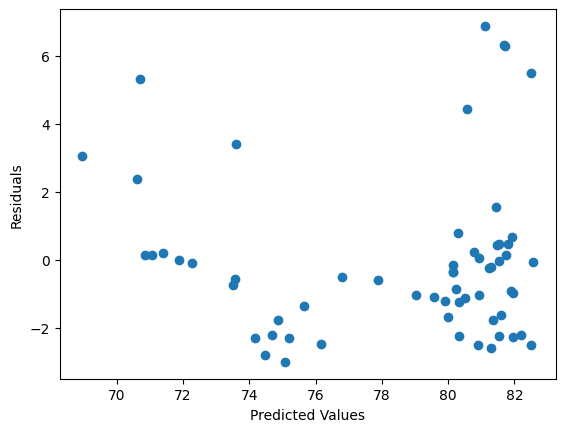

In [ ]:
# Intialize and fit the linear regression model with standard PCA using 6 components.   
linReg = LinearRegression()
linReg.fit(X_train_pca, y_train)

# Make prediction and get performance measures for training data.
regPredTrain = linReg.predict(X_train_pca)
rSquaredTraining = metrics.r2_score(y_train, regPredTrain)
trainRSME = metrics.mean_squared_error(y_train, regPredTrain)**(1/2)

# Make prediction and get performance measures for validation data.
regPredVal = linReg.predict(X_test_pca)
rSquaredVal = metrics.r2_score(y_test, regPredVal)
valRSME = metrics.mean_squared_error(y_test, regPredVal)**(1/2)

# print results from preceding regression analysis.
print('The R\u00b2 on the training data is ' + str(round(rSquaredTraining, 2)) + '.')
print('The R\u00b2 on the validation data is ' + str(round(rSquaredVal, 2)) + '.')
print('The Root Mean Squared Error on the training data is ' + str(round(trainRSME, 2)) + '.')
print('The Root Mean Squared Error on the validation data is ' + str(round(valRSME, 2)) + '.')


plt.scatter(regPredVal, (y_test - regPredVal))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Using PCA transformed data did not benefit the developed country subset. Using more than seven components did not significantly improve the results and would make the model more complicated than the regression models using the normal data. PCA transformed data was not tested on the developing country subset because that subset achieved very similar regression results to the entire dataset and would likely have similar results performing regression with the PCA transformed data. 

# Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Create Class labels for life expectancy
medianLifeExp = df['Life expectancy '].median()
df3Classify['LifeExpClasses'] = np.where(df3['Life expectancy ']>(medianLifeExp), 'highLifeExp', 'lowLifeExp')

I used the median life expectancy to split the countries between relatively high life expectancy and low life expectancy.

In [ ]:
# Create data frames for life expectancy classification.
y_LifeExpDF = df3Classify['LifeExpClasses']
X_LifeExpDF = df3Classify.iloc[:,1:18]  # Does not include the life expectancy numeric column.

In [ ]:
# Create data frames for country status classification.
y_CountryDF = df3Classify['Status_Developed']
X_CountryDF = df3Classify.iloc[:,0:18]  # Does include the life expectancy numeric column.

In [ ]:
def runModelClassify(X, y, model): 
    """Prints results of classification model, including confusion matrix, and returns X and y data sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('The accuracy of the training set is: ', round(metrics.accuracy_score(y_true = y_train, y_pred = pred_train)*100,2))
    print('The accuracy of the testing set is: ', round(metrics.accuracy_score(y_true = y_test, y_pred = pred_test)*100,2))
    print('Difference: ', metrics.accuracy_score(y_true = y_train, y_pred = pred_train) - metrics.accuracy_score(y_true = y_test, y_pred = pred_test))
    print('The following results are for the testing set:')
    print(metrics.classification_report(y_test, pred_test))
    
    fig, ax = plt.subplots(figsize=(3,3))
    metrics.plot_confusion_matrix(mdl,X_test, y_test, ax=ax)
    plt.show()
    
    return X, y

### Decision Tree

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  97.31
Difference:  0.02689486552567233
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       335
           1       0.93      0.92      0.93        74

    accuracy                           0.97       409
   macro avg       0.96      0.95      0.95       409
weighted avg       0.97      0.97      0.97       409



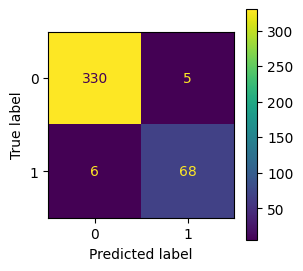

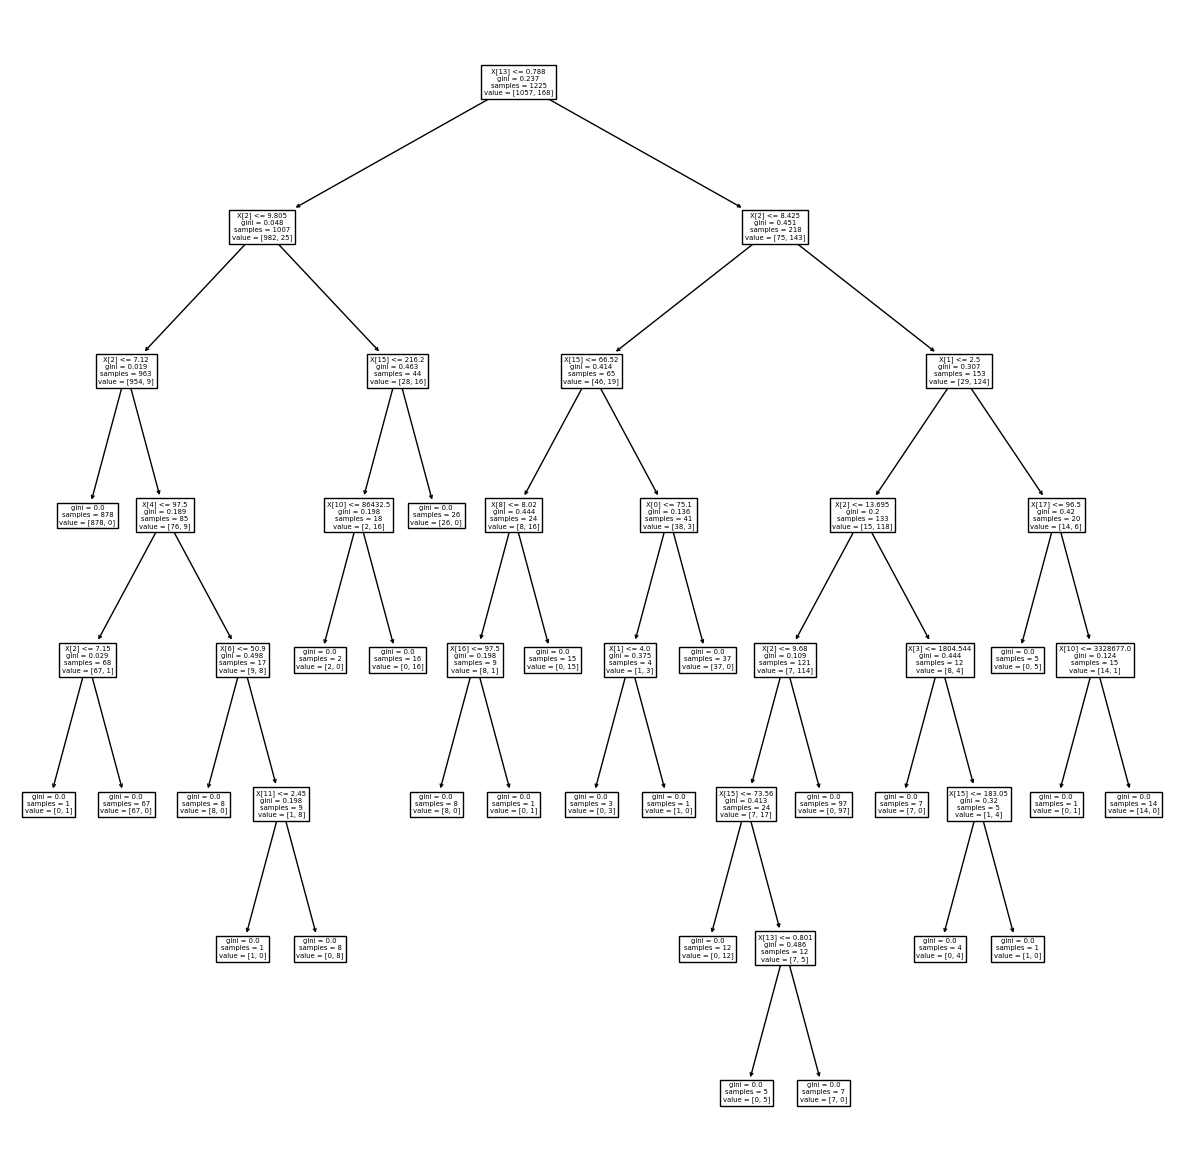

In [ ]:
# Decision Tree classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, DecisionTreeClassifier())

X_train, X_test, y_train, y_test = train_test_split(X_CountryDF, y_CountryDF, test_size=0.25, random_state=55)
mdl = DecisionTreeClassifier()
mdl.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(mdl, ax = ax)
plt.show()

    

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['gini', 'entropy']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}


The accuracy of the training set is:  96.49
The accuracy of the testing set is:  96.58
Difference:  -0.000872211965470715
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       335
           1       0.92      0.89      0.90        74

    accuracy                           0.97       409
   macro avg       0.95      0.94      0.94       409
weighted avg       0.97      0.97      0.97       409



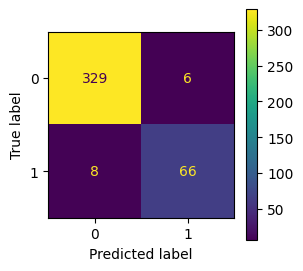

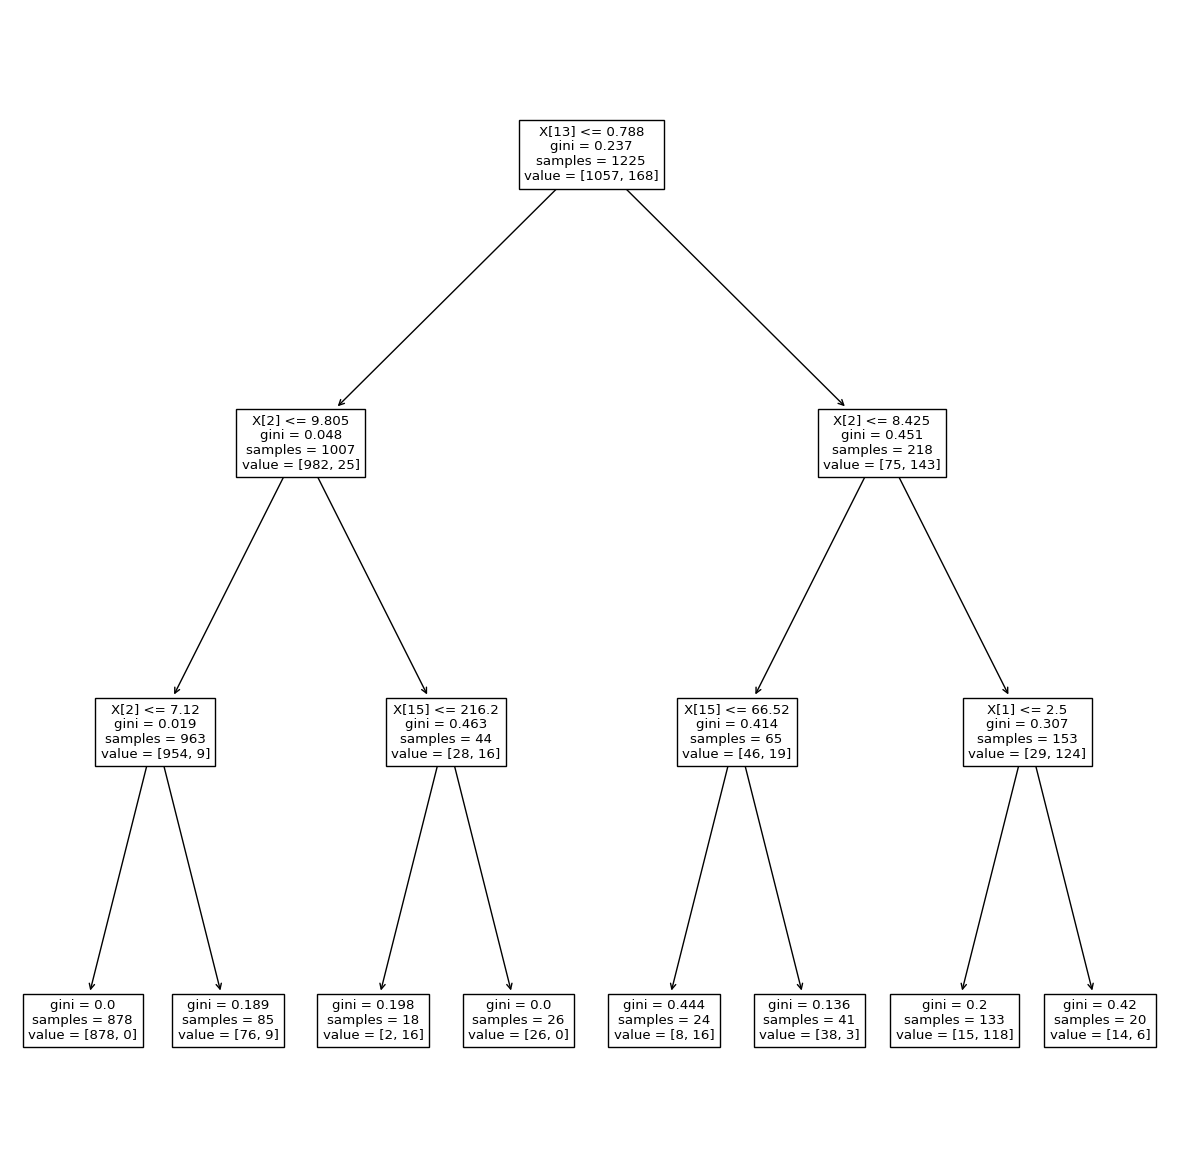

In [ ]:
# Decision Tree classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, DecisionTreeClassifier(max_depth = 3, min_samples_split = 25))

X_train, X_test, y_train, y_test = train_test_split(X_CountryDF, y_CountryDF, test_size=0.25, random_state=55)
mdl = DecisionTreeClassifier(max_depth = 3, min_samples_split = 25)
mdl.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(mdl, ax = ax)
plt.show()


The accuracy of the training set is:  98.12
The accuracy of the testing set is:  97.56
Difference:  0.005674367546529613
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       335
           1       0.96      0.91      0.93        74

    accuracy                           0.98       409
   macro avg       0.97      0.95      0.96       409
weighted avg       0.98      0.98      0.98       409



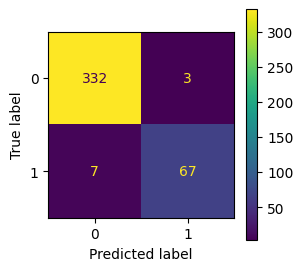

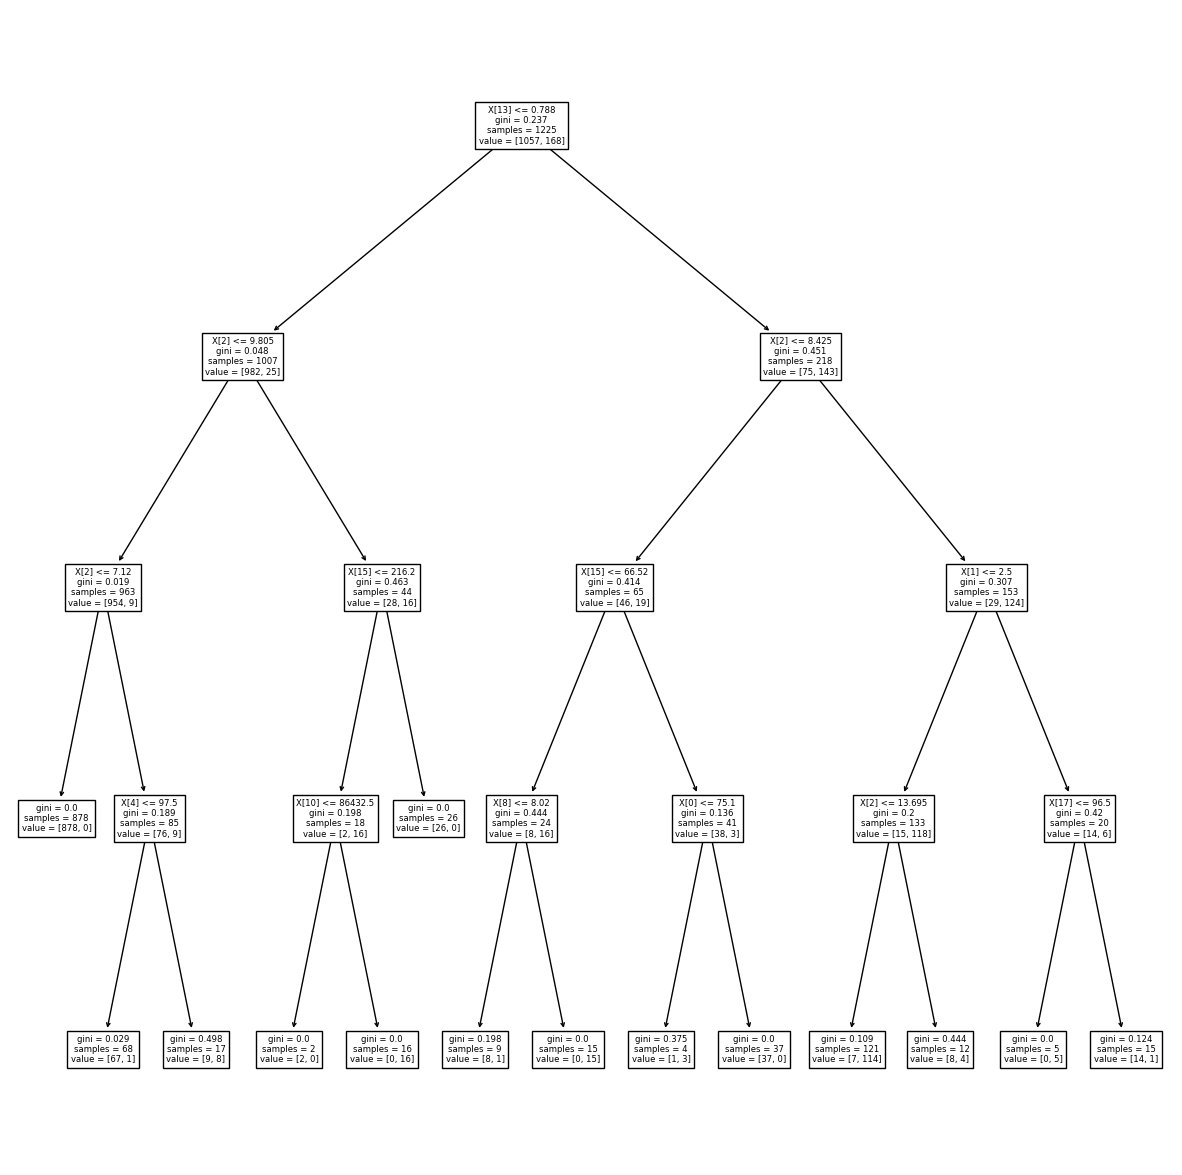

In [ ]:
# Decision Tree classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, DecisionTreeClassifier(max_depth = 4))

X_train, X_test, y_train, y_test = train_test_split(X_CountryDF, y_CountryDF, test_size=0.25, random_state=55)
mdl = DecisionTreeClassifier(max_depth = 4)
mdl.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(mdl, ax = ax)
plt.show()

### K Nearest Neighboors

In [ ]:
# Scale Life Expectancy data frame
scaler = MinMaxScaler()
scaler.fit(X_LifeExpDF)
X_LifeExpMinMax = scaler.transform(X_LifeExpDF)

In [ ]:
# Scale Country data frame
scaler = MinMaxScaler()
scaler.fit(X_CountryDF)
X_CountryMinMax = scaler.transform(X_CountryDF)

Data for KNN classifier needs to be scaled so features with relatively large ranges do not dominate the analysis.

The accuracy of the training set is:  98.2
The accuracy of the testing set is:  96.82
Difference:  0.01382565740232522
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       335
           1       0.92      0.91      0.91        74

    accuracy                           0.97       409
   macro avg       0.95      0.94      0.95       409
weighted avg       0.97      0.97      0.97       409



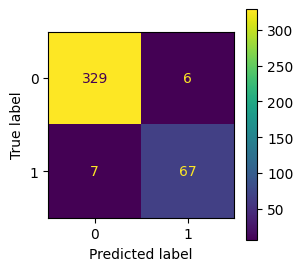

In [ ]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 5))
print()

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
kvalues = np.arange(3,13,2)
weightsValues = ['uniform', 'distance']
gridDict = {'n_neighbors': kvalues, 'weights': weightsValues}
grid = GridSearchCV(KNeighborsClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryMinMax, y_CountryDF)
print(grid.best_params_) 

{'n_neighbors': 11, 'weights': 'uniform'}


The accuracy of the training set is:  97.8
The accuracy of the testing set is:  96.09
Difference:  0.0170789880744473
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       335
           1       0.93      0.85      0.89        74

    accuracy                           0.96       409
   macro avg       0.95      0.92      0.93       409
weighted avg       0.96      0.96      0.96       409



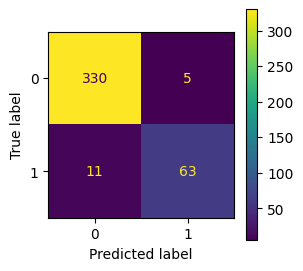

In [ ]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 11, weights = 'uniform'))
print()

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  97.31
Difference:  0.02689486552567233
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       335
           1       0.93      0.92      0.93        74

    accuracy                           0.97       409
   macro avg       0.96      0.95      0.95       409
weighted avg       0.97      0.97      0.97       409



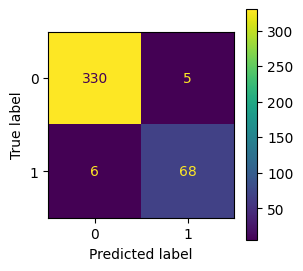

In [ ]:
# KNN classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryMinMax, y_CountryDF, KNeighborsClassifier(n_neighbors = 1, weights = 'distance'))
print()

Using one nearest neighbor with distance weighting gave the best results. However, I am skeptical of using only one nearest neighbor as it is sensitive to noise. Using a validation set would be good to confirm the results. Since KNN is not among the top three or four classifier models, I will move on instead of further investigating. 

### Random Forest

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  99.02
Difference:  0.009779951100244544
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       335
           1       0.97      0.97      0.97        74

    accuracy                           0.99       409
   macro avg       0.98      0.98      0.98       409
weighted avg       0.99      0.99      0.99       409



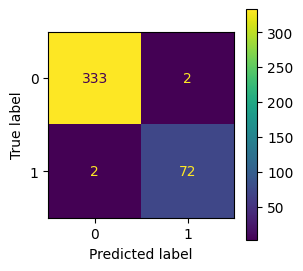

In [ ]:
# Random Forest classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, RandomForestClassifier(random_state = 210))

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
maxDepthValues = np.arange(2,7)
minSamplesSplit = np.arange(5,30,5)
criterion = ['gini', 'entropy']
gridDict = {'max_depth': maxDepthValues, 'min_samples_split': minSamplesSplit, 'criterion': criterion}
grid = GridSearchCV(RandomForestClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 25}


The accuracy of the training set is:  97.96
The accuracy of the testing set is:  95.84
Difference:  0.021156628910733
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       335
           1       0.89      0.88      0.88        74

    accuracy                           0.96       409
   macro avg       0.93      0.93      0.93       409
weighted avg       0.96      0.96      0.96       409



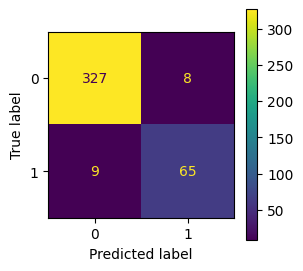

In [ ]:
# Random Forest classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 15, random_state = 210))

Unlike with country status, not setting a max_depth for life expectancy cauces concern for overfitting. The testing set's balanced accuracy is similar, but the training set becomes 100%. 

### AdaBoost Classifier

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
learning_rateValues = np.linspace(.01,1,100)
nEstimatorsValues = np.arange(50,300,25)
gridDict = {'learning_rate': learning_rateValues, 'n_estimators': nEstimatorsValues}
grid = GridSearchCV(AdaBoostClassifier(), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

{'learning_rate': 0.03, 'n_estimators': 125}


The accuracy of the training set is:  96.0
The accuracy of the testing set is:  95.11
Difference:  0.008899755501222462
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       335
           1       0.85      0.89      0.87        74

    accuracy                           0.95       409
   macro avg       0.91      0.93      0.92       409
weighted avg       0.95      0.95      0.95       409



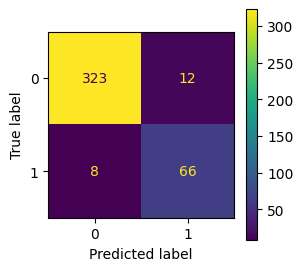

In [ ]:
# AdaBoost classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, AdaBoostClassifier(n_estimators=125, learning_rate=.03, random_state = 210))

The accuracy of the training set is:  100.0
The accuracy of the testing set is:  98.29
Difference:  0.017114914425427896
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       335
           1       0.97      0.93      0.95        74

    accuracy                           0.98       409
   macro avg       0.98      0.96      0.97       409
weighted avg       0.98      0.98      0.98       409



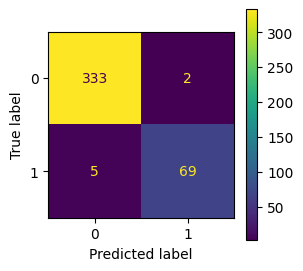

In [ ]:
# AdaBoost classifying developing (0) vs developed (1).
X, y = runModelClassify(X_CountryDF, y_CountryDF, AdaBoostClassifier(n_estimators=100, learning_rate=.8, random_state = 210))

Despite the gridsearch results, further testing found .8 produced better classification results. 

### Support Vector Classification

Like KNN, support vector classification needs to used scaled data. 

In [ ]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
gammaValues = np.linspace(.1,1.1,10)
cValues = np.linspace(.75,2,15)
#kernelValues = ['linear', 'poly', 'rbf']
kernelValues = ['poly']
gridDict = {'gamma': gammaValues ,'C': cValues, 'kernel': kernelValues}
grid = GridSearchCV(SVC(kernel='poly'), gridDict, n_jobs=-1)
grid.fit(X_CountryMinMax, y_CountryDF)
print(grid.best_params_) 

{'C': 1.5535714285714286, 'gamma': 0.1, 'kernel': 'poly'}


The accuracy of the training set is:  92.73
The accuracy of the testing set is:  91.2
Difference:  0.015366498677710672
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       335
           1       0.84      0.64      0.72        74

    accuracy                           0.91       409
   macro avg       0.88      0.80      0.84       409
weighted avg       0.91      0.91      0.91       409



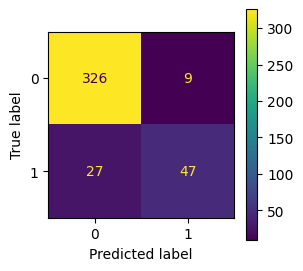

In [ ]:
# SVC classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryMinMax, y_CountryDF, SVC(kernel='poly', C = 1.55, gamma = 0.1))

The accuracy of the training set is:  94.69
The accuracy of the testing set is:  93.15
Difference:  0.015398433211915585
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       335
           1       0.85      0.76      0.80        74

    accuracy                           0.93       409
   macro avg       0.90      0.86      0.88       409
weighted avg       0.93      0.93      0.93       409



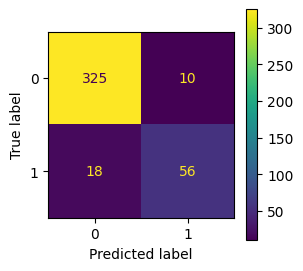

In [ ]:
# SVC classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryMinMax, y_CountryDF, SVC(kernel='poly', random_state=210))

Despite the gridsearch results, further tuning by hand found hyper-parameters that produced better results. 

### Naive Bayes Classification

The accuracy of the training set is:  82.94
The accuracy of the testing set is:  85.82
Difference:  -0.02880295394441401
The following results are for the testing set:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       335
           1       0.56      0.97      0.71        74

    accuracy                           0.86       409
   macro avg       0.78      0.90      0.81       409
weighted avg       0.92      0.86      0.87       409



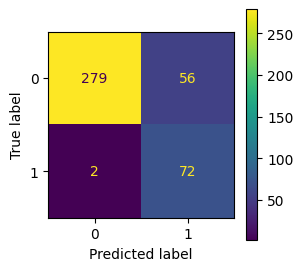

In [ ]:
# NB classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryMinMax, y_CountryDF, GaussianNB())

### Gradient Boosting Classifier

In [1]:
# Perform GridSearchCV to find optimal kernel-specific and regularization parameter values. 
learning_rateValues = np.linspace(.01,1,100)
nEstimatorsValues = np.arange(50,300,25)
gridDict = {'learning_rate': learning_rateValues, 'n_estimators': nEstimatorsValues}
grid = GridSearchCV(GradientBoostingClassifier(n_estimators = 100), gridDict, n_jobs=-1)
grid.fit(X_CountryDF, y_CountryDF)
print(grid.best_params_) 

NameError: ignored

In [ ]:
# Gradient boosting classifying developing (0) vs developed (1).

X, y = runModelClassify(X_CountryDF, y_CountryDF, GradientBoostingClassifier(n_estimators = 200, learning_rate = .61, random_state = 210))

Regression models were more successful at predicting life expectancy for developing countries (R$^2$  = .87 - .96) than developed (R$^2$  = .74 - .8). The top 5 important predictors for developing countries include adult mortality, schooling, income composition of resources, HIC/AIDS, BMI. The top 5 important predictors for developed countries include Adult mortality, thinness 10-19, income composition of resources, thinness 5-9, and percentage expenditure (closely followed by GDP). The data has multicollinearity that was regularized by Lasso and Ridge regression. Random forest regression as also use to deal with multicollinearity. The overall data set's top predictors are closely aligned with developing countries because of the large class imbalance.

The gradient boosting classifier was the best classifier for classifying country status, closely followed by the random forest classifier. They both had the highest balanced accuracy for the testing set and weighted F-1 scores, which indicate a good balance between recall and precision for both classes. The high success rate of the two shows a distinct difference between developed and developing countries. The classification results confirm the indication from the regression models that there was a difference between the two. 